# Yandex.Afisha Business Analysis (June 2017 - May 2018)

#### The purpose of this analysis is to analyze business metrics as well as user metrics. We will also study how people use the product, when they start to buy, how much money each customer brings, and when we see a return on investment. We will also attempt to optimize marketing expenses. 

#### Description of the data

The `visits` table (server logs with data on website visits):

- *Uid* — user's unique identifier
- *Device* — user's device
- *Start Ts* — session start date and time
- *End Ts* — session end date and time
- *Source Id* — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The `orders` table (data on orders):

- *Uid* — unique identifier of the user making an order
- *Buy Ts* — order date and time
- *Revenue* — Yandex.Afisha's revenue from the order

The `costs` table (data on marketing expenses):

- source_*id* — ad source identifier
- *dt* — date
- *costs* — expenses on this ad source on this day

### Reading in Data and Preprocessing

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

In [2]:
#loading visits df and changing dtypes 
visits = pd.read_csv('visits_log_us.csv',  dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [3]:
#looking for missing values
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [4]:
#checking for duplicates
visits.duplicated().sum()

0

In [5]:
#renaming visits column names
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [6]:
#loading orders df and changing dtypes 
orders = pd.read_csv('orders_log_us.csv', parse_dates=['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
#looking for missing values
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [8]:
#checking for duplicates
orders.duplicated().sum()

0

In [9]:
#renaming orders column names 
orders.columns = ['buy_ts', 'revenue', 'uid']
orders.head()

buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450

In [10]:
#loading costs df and changing dtypes 
costs = pd.read_csv('costs_us.csv', parse_dates=['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [11]:
#looking for missing values
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [12]:
#checking for duplicates
costs.duplicated().sum()

0

In [13]:
costs.head()

source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

### Finding DAU, WAU, MAU

In [14]:
#extracting the year, month, week, and date from session start date of visits df
visits['session_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  category      
 1   end_ts         359400 non-null  datetime64[ns]
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  datetime64[ns]
 4   uid            359400 non-null  uint64        
 5   session_year   359400 non-null  datetime64[ns]
 6   session_month  359400 non-null  datetime64[ns]
 7   session_week   359400 non-null  datetime64[ns]
 8   session_date   359400 non-null  object        
dtypes: category(1), datetime64[ns](5), int64(1), object(1), uint64(1)
memory usage: 22.3+ MB


In [16]:
# changing data type to datetype
visits['session_date'] = pd.to_datetime(visits['session_date'])

In [17]:
# creating new columns for month and day values to 'orders' table
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['order_date'] = orders['buy_ts'].dt.date
# changing data type to datetype
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [18]:
# creating new columns for year, month, week, and day values to 'marketing_costs'
costs['cost_month']=costs['dt'].astype('datetime64[M]')

In [19]:
#finding daily, weekly, and montly active users
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

In [20]:
print('DAU for the entire period:', int(dau_total), 'users')
print('WAU for the entire period:', int(wau_total), 'users')
print('MAU for the entire period:', int(mau_total), 'users')

DAU for the entire period: 907 users
WAU for the entire period: 5621 users
MAU for the entire period: 23228 users


#### There are hundreds of users visiting the website everyday and even thousands per week and monthly which is great news. 

In [21]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_year session_month session_week session_date  
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20  
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19  
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01  
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20  
4   9969694820036681168   2017-01-01    2017-12-01   2017-12-21   2017-12-27

In [22]:
#Compute daily active users. Group data by date and calculate DAU for each day
dau_daily = {}

for day, df in visits.groupby('session_date'):
    key = day.strftime('%Y-%m-%d')
    value = df.groupby('session_date').agg({'uid': 'nunique'}).mean()
    dau_daily[key] = int(value)

In [23]:
dau_daily

{'2017-06-01': 605,
 '2017-06-02': 608,
 '2017-06-03': 445,
 '2017-06-04': 476,
 '2017-06-05': 820,
 '2017-06-06': 797,
 '2017-06-07': 699,
 '2017-06-08': 868,
 '2017-06-09': 695,
 '2017-06-10': 350,
 '2017-06-11': 292,
 '2017-06-12': 335,
 '2017-06-13': 502,
 '2017-06-14': 499,
 '2017-06-15': 575,
 '2017-06-16': 481,
 '2017-06-17': 328,
 '2017-06-18': 285,
 '2017-06-19': 482,
 '2017-06-20': 458,
 '2017-06-21': 436,
 '2017-06-22': 537,
 '2017-06-23': 446,
 '2017-06-24': 328,
 '2017-06-25': 383,
 '2017-06-26': 564,
 '2017-06-27': 489,
 '2017-06-28': 552,
 '2017-06-29': 546,
 '2017-06-30': 439,
 '2017-07-01': 361,
 '2017-07-02': 330,
 '2017-07-03': 594,
 '2017-07-04': 511,
 '2017-07-05': 519,
 '2017-07-06': 578,
 '2017-07-07': 542,
 '2017-07-08': 389,
 '2017-07-09': 444,
 '2017-07-10': 685,
 '2017-07-11': 564,
 '2017-07-12': 669,
 '2017-07-13': 741,
 '2017-07-14': 839,
 '2017-07-15': 694,
 '2017-07-16': 514,
 '2017-07-17': 1138,
 '2017-07-18': 706,
 '2017-07-19': 547,
 '2017-07-20': 594,

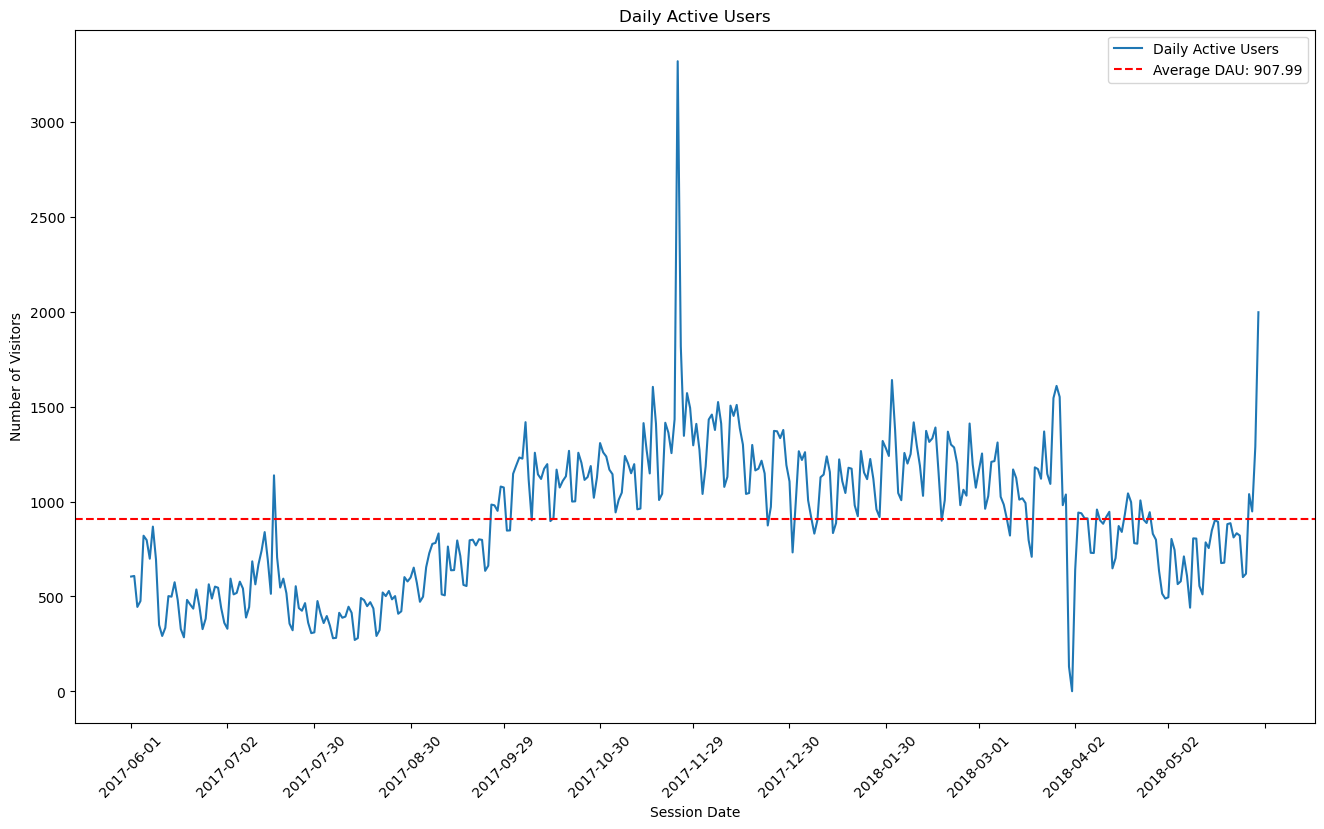

In [24]:
#plotting DAU
import matplotlib.dates as mdates

# Calculate average daily active users
average_dau = sum(dau_daily.values()) / len(dau_daily)

# plotting DAU
x = list(dau_daily.keys())
y = list(dau_daily.values())

plt.figure(figsize=(16,9))
plt.plot(x, y, label='Daily Active Users')

# Add dotted reference line for average DAU
plt.axhline(y=average_dau, color='r', linestyle='--', label=f'Average DAU: {average_dau:.2f}')

plt.xlabel('Session Date')
plt.ylabel('Number of Visitors')
plt.title('Daily Active Users')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Add legend
plt.legend()

plt.show()

#### We can see the spike of daily active users highest in November possibly due to black Friday and the lowest was in end of March. 

In [25]:
# Compute weekly active users. Group data by week and calculate WAU for each week.
wau_weekly = {}

for week, df in visits.groupby('session_week'):
    key = week.strftime('%Y-%m-%d')
    value = df['uid'].nunique()  # Count unique users for the week
    wau_weekly[key] = value

In [26]:
wau_weekly 

{'2017-06-01': 4082,
 '2017-06-08': 3311,
 '2017-06-15': 2844,
 '2017-06-22': 3079,
 '2017-06-29': 3055,
 '2017-07-06': 3563,
 '2017-07-13': 4790,
 '2017-07-20': 2978,
 '2017-07-27': 2505,
 '2017-08-03': 2343,
 '2017-08-10': 2658,
 '2017-08-17': 2856,
 '2017-08-24': 3337,
 '2017-08-31': 4056,
 '2017-09-07': 4311,
 '2017-09-14': 4625,
 '2017-09-21': 5377,
 '2017-09-28': 6888,
 '2017-10-05': 7535,
 '2017-10-12': 6896,
 '2017-10-19': 7375,
 '2017-10-26': 7638,
 '2017-11-02': 7226,
 '2017-11-09': 7441,
 '2017-11-16': 8294,
 '2017-11-23': 10716,
 '2017-11-30': 8122,
 '2017-12-07': 8575,
 '2017-12-14': 7611,
 '2017-12-21': 7597,
 '2017-12-28': 7334,
 '2018-01-04': 6672,
 '2018-01-11': 6829,
 '2018-01-18': 7123,
 '2018-01-25': 7341,
 '2018-02-01': 8016,
 '2018-02-08': 8218,
 '2018-02-15': 7639,
 '2018-02-22': 7319,
 '2018-03-01': 7470,
 '2018-03-08': 6439,
 '2018-03-15': 6387,
 '2018-03-22': 8486,
 '2018-03-29': 3511,
 '2018-04-05': 5590,
 '2018-04-12': 5382,
 '2018-04-19': 5894,
 '2018-04-26

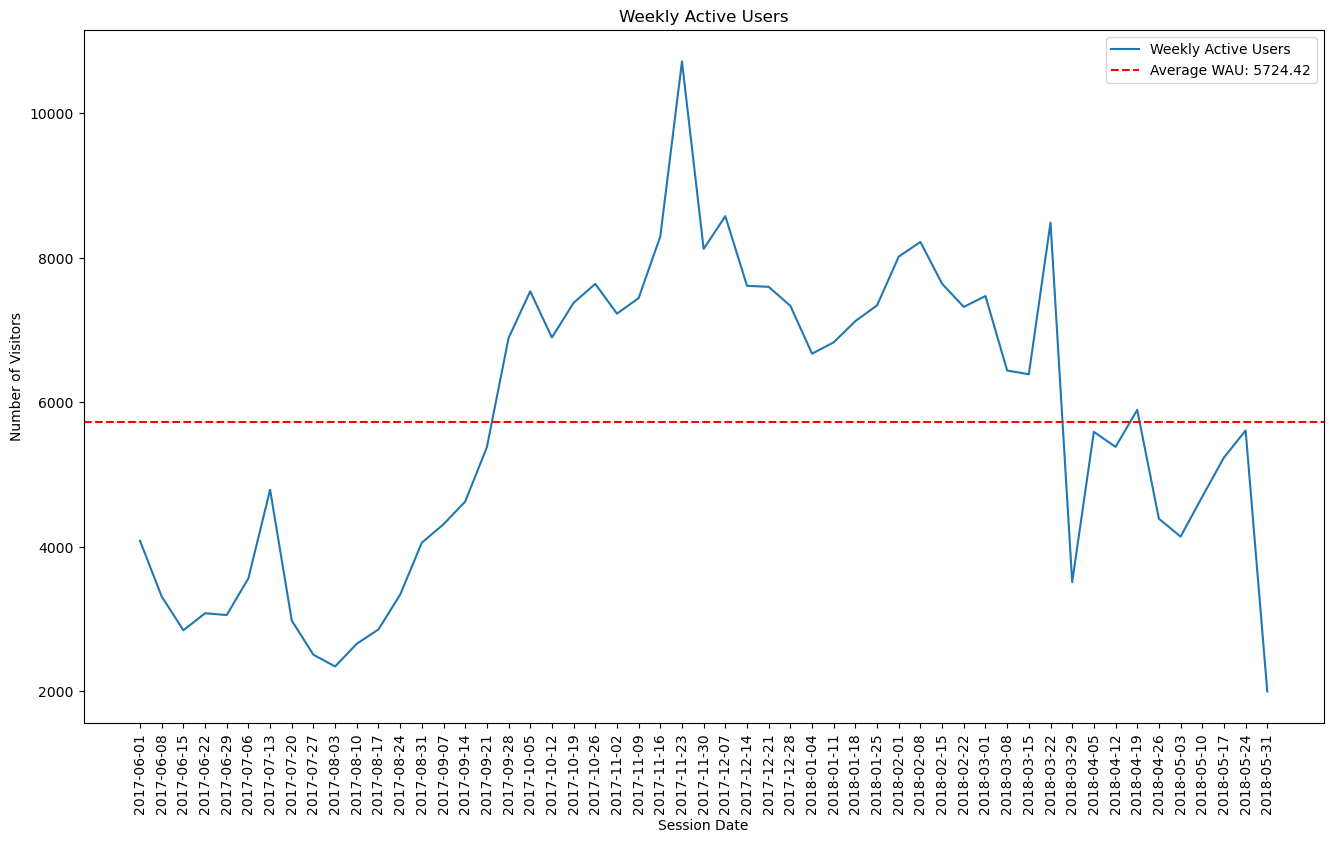

In [27]:
# Calculate average WAU
average_wau = sum(wau_weekly.values()) / len(wau_weekly)

# Convert dictionary keys and values to lists
x = list(wau_weekly.keys())
y = list(wau_weekly.values())

# Create line plot for weekly active users (WAU)
plt.figure(figsize=(16, 9))
plt.plot(x, y, label='Weekly Active Users')

# Add dotted reference line for average WAU
plt.axhline(y=average_wau, color='r', linestyle='--', label=f'Average WAU: {average_wau:.2f}')

plt.xlabel('Session Date')
plt.ylabel('Number of Visitors')
plt.title('Weekly Active Users')
plt.xticks(rotation=90)
plt.legend()

plt.show()

#### The distribution of WAU closely follows the overall pattern of DAU. 

#### The lowest point is at the end of July 2017. There was a spike on the week of 11/23/17 possibly due to Black Friday and a dip on the week of 3/29/18. Why is there such a large dip? Did something economically related happen? The MAU goes back up afterwards but starts to trend down slowly. 

In [28]:
# Compute monthly active users. Group data by month and calculate MAU for each week.
mau = {}

for month, df in visits.groupby('session_month'):
    key = month.strftime('%Y-%m-%d')
    value = df['uid'].nunique()  # Count unique users for the week
    mau[key] = value

In [29]:
mau

{'2017-06-01': 13259,
 '2017-07-01': 14183,
 '2017-08-01': 11631,
 '2017-09-01': 18975,
 '2017-10-01': 29692,
 '2017-11-01': 32797,
 '2017-12-01': 31557,
 '2018-01-01': 28716,
 '2018-02-01': 28749,
 '2018-03-01': 27473,
 '2018-04-01': 21008,
 '2018-05-01': 20701}

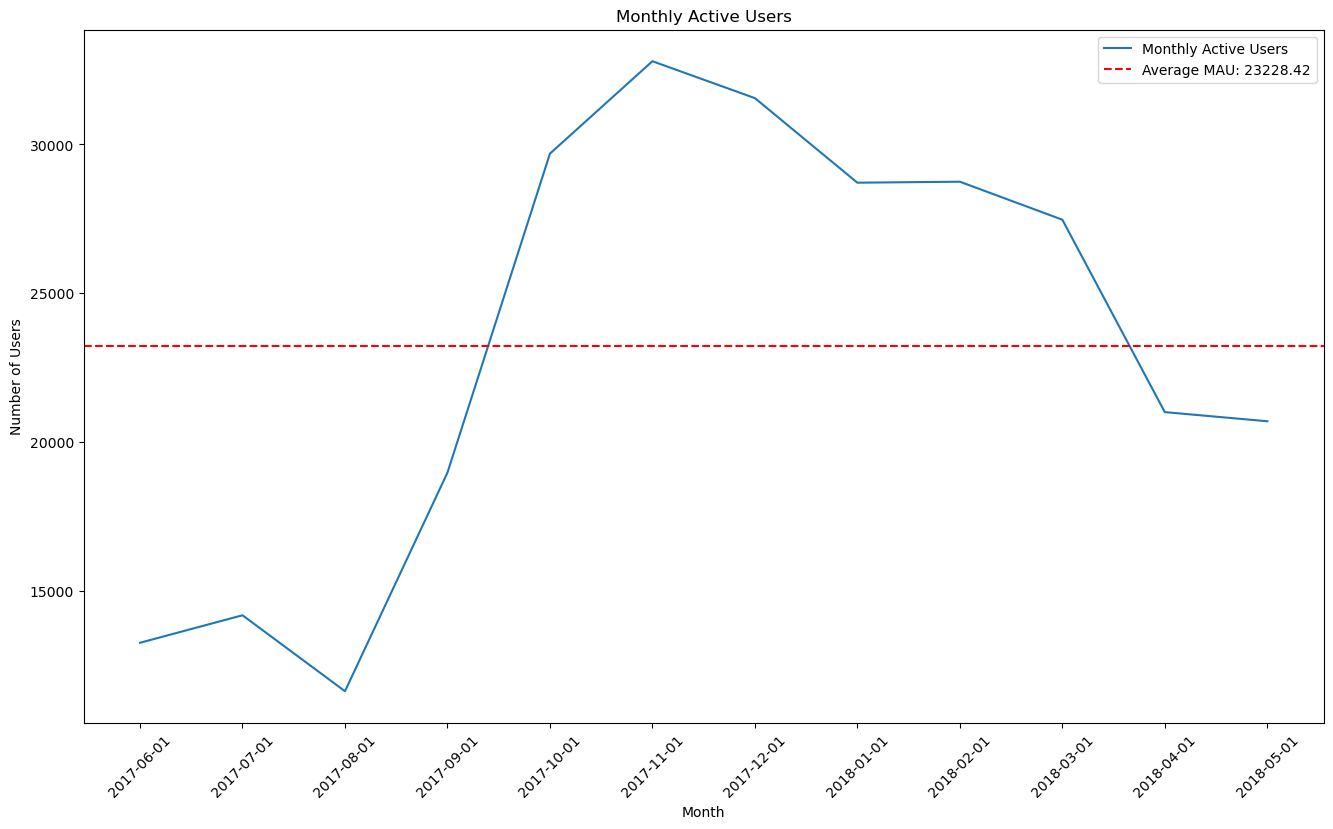

In [30]:
# Calculate average MAU
average_mau = sum(mau.values()) / len(mau)

# Convert dictionary keys and values to lists
x = list(mau.keys())
y = list(mau.values())

# Create line plot for monthly active users (MAU)
plt.figure(figsize=(16, 9))
plt.plot(x, y, label='Monthly Active Users')

# Add dotted reference line for average MAU
plt.axhline(y=average_mau, color='r', linestyle='--', label=f'Average MAU: {average_mau:.2f}')

plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Monthly Active Users')
plt.xticks(rotation=45)
plt.legend()

plt.show()

#### The MAU distribution reflects a simlar pattern to DAU and WAU. The amount of monthly active users peak in November and slowly decrease after February. There is a nice steady increase in sales from August to November.This increase is possibly due to Black Friday or winter sales if there was a huge sale at this time. We may want to see why there was a decrease in February. 

In [31]:
#looking at the sticky factor
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)
sticky_mau = dau_total / mau_total * 100
print(sticky_mau)

uid    16.151541
dtype: float64
uid    3.90897
dtype: float64


#### An ideal sticky factor is 20%. The weekly active user sticky factor is 16% and monthly is about 4%. We may consider ways to improve this. 

### Analyzing User Sessions

In [32]:
# calculating the total number of sessions (count) and the number of users (nunique) for each date
sess_per_user = visits.groupby('session_date').agg({'uid': ['count','nunique']})
sess_per_user.columns = ['n_sessions', 'n_users']
sess_per_user

n_sessions  n_users
session_date                     
2017-06-01           664      605
2017-06-02           658      608
2017-06-03           477      445
2017-06-04           510      476
2017-06-05           893      820
...                  ...      ...
2018-05-27           672      620
2018-05-28          1156     1039
2018-05-29          1035      948
2018-05-30          1410     1289
2018-05-31          2256     1997

[364 rows x 2 columns]

In [33]:
#finding the number of sessions per user 
sess_per_user['sess_per_user'] = sess_per_user['n_sessions'] / sess_per_user['n_users']
sess_per_user

n_sessions  n_users  sess_per_user
session_date                                    
2017-06-01           664      605       1.097521
2017-06-02           658      608       1.082237
2017-06-03           477      445       1.071910
2017-06-04           510      476       1.071429
2017-06-05           893      820       1.089024
...                  ...      ...            ...
2018-05-27           672      620       1.083871
2018-05-28          1156     1039       1.112608
2018-05-29          1035      948       1.091772
2018-05-30          1410     1289       1.093871
2018-05-31          2256     1997       1.129695

[364 rows x 3 columns]

In [34]:
# calculating the averall total number of sessions per user per day 
total_sessions_per_user = sess_per_user['sess_per_user'].mean()
print('The overall total number of sessions per user per day is: ', int(total_sessions_per_user))

The overall total number of sessions per user per day is:  1


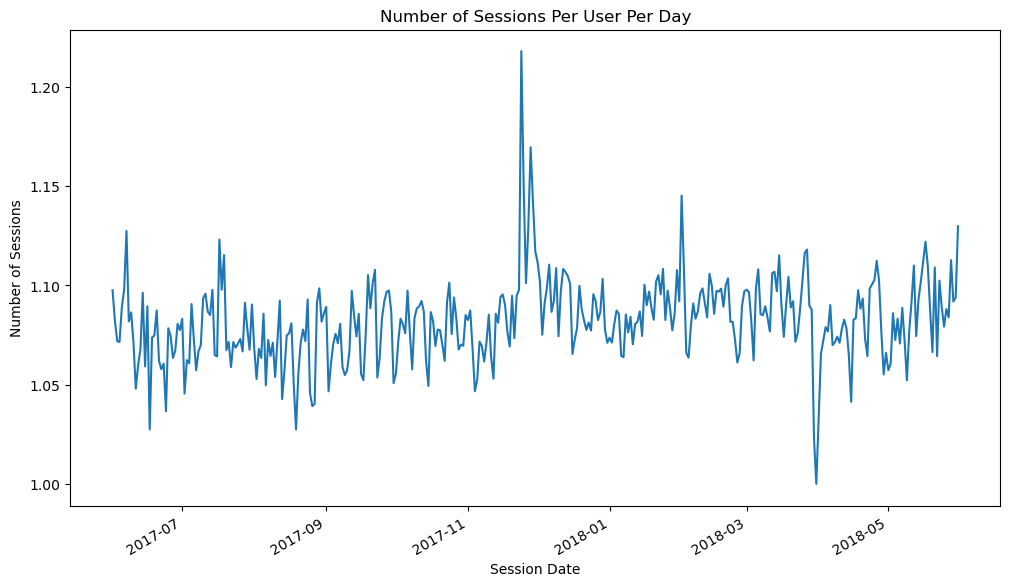

In [35]:
#plotting the number of sessions per day 
sess_per_user['sess_per_user'].plot(kind='line', figsize=(12,7))
plt.xlabel('Session Date')
plt.ylabel('Number of Sessions')
plt.title('Number of Sessions Per User Per Day');

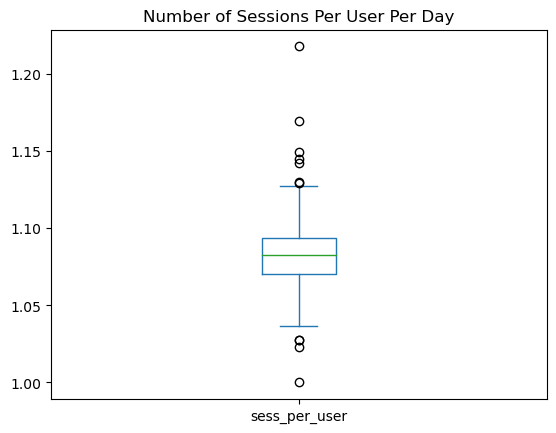

In [36]:
#looking at sessions per user in boxplot
sess_per_user['sess_per_user'].plot(kind='box')
plt.title('Number of Sessions Per User Per Day');

#### The average number of sessions per user per day is about 1.08. User sessions peak around November and drop around April. Speaking in terms of engagement, if the user is coming back to check the website at least once a day, that is good. But maybe after checking once a day for so long, visits drop. This may explain what is happening in April. Maybe we can look into what the user is specifically looking for. Are they waiting for restock of certain items or are they looking for a sale or discount to purchase?

In [37]:
#calculating overall sessions per day
total_sessions_per_day = sess_per_user['n_sessions'].mean()
print('The overall total number of sessions per day is: ', int(total_sessions_per_day))

The overall total number of sessions per day is:  987


In [38]:
# finding user length in minutes (finding in seconds, then dividing by 60 seconds per min)
visits['session_duration_min'] = ((
    visits['end_ts'] - visits['start_ts']
).dt.seconds)/60

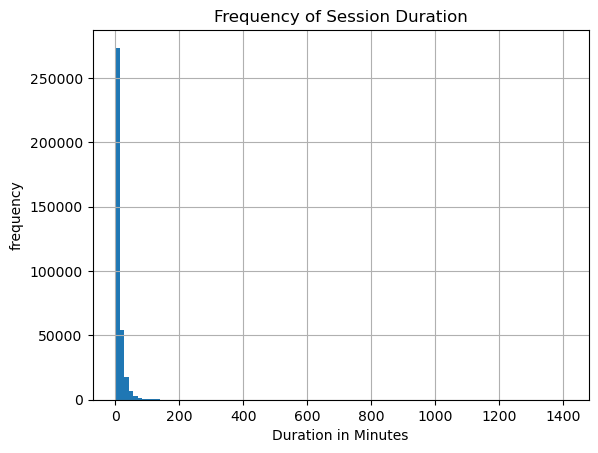

In [39]:
#plotting frequency of session duration
visits['session_duration_min'].hist(bins=100)
plt.xlabel('Duration in Minutes')
plt.ylabel('frequency')
plt.title('Frequency of Session Duration');

In [40]:
#finding average session length using mode due to abnormal distribution lengths of session 
asl = visits['session_duration_min'].mode()
asl

0    1.0
Name: session_duration_min, dtype: float64

#### The average session length is 1 minute. Are users just browsing?

### Evaluating User Retention Rate

In [41]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid session_year session_month session_week session_date  \
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
4   9969694820036681168   2017-01-01    2017-12-01   2017-12-21   2017-12-27   

   session_duration_min  
0                  18.0  
1                  28.0  
2                   0.0  
3                  24.0  
4                   0.0

In [42]:
# retrieving the date of the first order for each customer
first_session_date = visits.groupby('uid')['session_date'].min()
# renaming the column to avoid repetitions in column names
first_session_date.name = 'first_session_date' 
# adding date of the first session to 'visits' table by merging two tables
visits = visits.merge(first_session_date, on='uid')
# checking the result
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    uid session_year session_month session_week session_date  \
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
4  16174680259334210214   2018-01-01    2018-03-01   2018-03-08   2018-03-09   

   session_duration_min first_session_date  
0                  18.0         2017-12-20  
1                  28.0         2018-02-19  
2                   0.0         2017-07-01  
3                  24.0         2018-03-09  
4                  28.0         2018-03-09

### Cohort Analysis

In [43]:
#forming cohorts by month and calculating lifetime within cohort 
# exrtracting first session month
visits['cohort_month'] = visits['first_session_date'].astype('datetime64[M]')
# Calculating cohort lifetime
visits['cohort_lifetime'] = pd.to_datetime(visits['session_month']) - pd.to_datetime(visits['cohort_month'])
# converting the lifetime duration to months 
# storing the results to a new column 'cohort_lifetime'
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype(int)
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    uid session_year session_month session_week session_date  \
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
4  16174680259334210214   2018-01-01    2018-03-01   2018-03-08   2018-03-09   

   session_duration_min first_session_date cohort_month  cohort_lifetime  
0                  18.0         2017-12-20   2017-12-01                0  
1                  28.0         2018-02-19   2018-02-01                0  
2                   0.0         2017-07-01   2017-07-01                0  
3                  24.0         2018-03-09   2018-03-01                2  
4                  28.0         2018-03-09   2018-03-01                0

In [44]:
#calculating the number of active users at a certain lifetime month for each cohort 
cohorts = visits.groupby(['cohort_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# renaming the column
cohorts = cohorts.rename(columns = {'uid':'n_users'})
cohorts.head()

cohort_month  cohort_lifetime  n_users
0   2017-06-01                0    13259
1   2017-06-01                1     1043
2   2017-06-01                2      713
3   2017-06-01                3      814
4   2017-06-01                4      909

In [45]:
#performing cohort analysis based on first session visit month
cohort_pivot = visits.pivot_table(index='cohort_month',
                  columns='cohort_lifetime',
                  values='uid',
                  aggfunc='nunique')
cohort_pivot

cohort_lifetime       0       1       2       3      4      5      6      7   \
cohort_month                                                                   
2017-06-01       13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01       13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01       10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01       16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01       25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01       27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    NaN   
2017-12-01       25268.0  1410.0   960.0   786.0  512.0  481.0    NaN    NaN   
2018-01-01       22624.0  1351.0   890.0   565.0  458.0    NaN    NaN    NaN   
2018-02-01       22197.0  1267.0   565.0   446.0    NaN    NaN    NaN    NaN   
2018-03-01       20589.0   861.0   557.0     NaN    NaN    NaN    NaN    NaN   
2018-04-01       15709.0   760.0     NaN     NaN    NaN    NaN    NaN    NaN   
2018-05-01       15273.0     NaN     NaN     NaN    NaN    NaN    NaN    NaN   

cohort_lifetime     8      9      10     11  
cohort_month                                 
2017-06-01       694.0  674.0  539.0  596.0  
2017-07-01       510.0  376.0  361.0    NaN  
2017-08-01       284.0  265.0    NaN    NaN  
2017-09-01       381.0    NaN    NaN    NaN  
2017-10-01         NaN    NaN    NaN    NaN  
2017-11-01         NaN    NaN    NaN    NaN  
2017-12-01         NaN    NaN    NaN    NaN  
2018-01-01         NaN    NaN    NaN    NaN  
2018-02-01         NaN    NaN    NaN    NaN  
2018-03-01         NaN    NaN    NaN    NaN  
2018-04-01         NaN    NaN    NaN    NaN  
2018-05-01         NaN    NaN    NaN    NaN

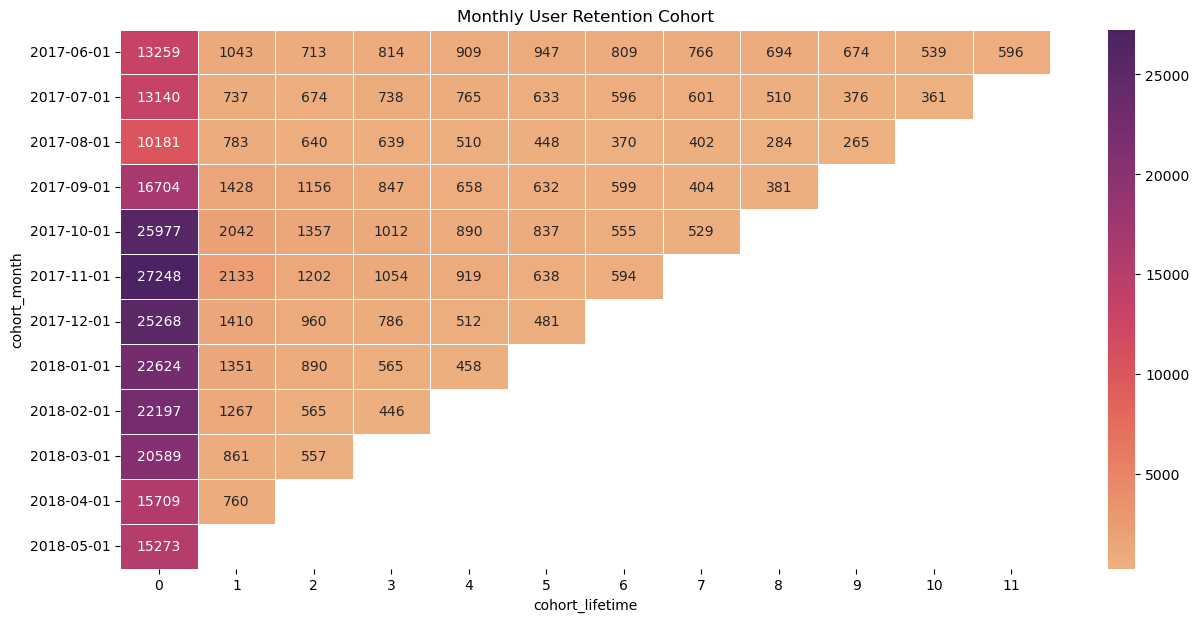

In [46]:
#looking at the total number of visitors per month in each cohort 
# converting the values to numeric type
cohort_pivot = cohort_pivot.astype(float)
# converting the index to string for a nicer output
cohort_pivot.index = cohort_pivot.index.astype(str)
plt.figure(figsize=(15,7))
plt.title('Monthly User Retention Cohort')
sns.heatmap(cohort_pivot, annot=True, linewidth=.5, fmt='g', cmap='flare');

#### Over time, the number of visitors slowly decrease. Cohorts from October and November are the highest the second month. 

In [47]:
#calculating retention rate from first visit month
retention = pd.DataFrame()
for col in cohort_pivot.columns:
    retention = pd.concat([retention, cohort_pivot[col]/cohort_pivot[0]], axis=1)
retention.columns = cohort_pivot.columns
retention.fillna('')

cohort_lifetime   0         1         2         3         4         5   \
2017-06-01       1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07-01       1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08-01       1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09-01       1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10-01       1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11-01       1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12-01       1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01-01       1.0  0.059715  0.039339  0.024973  0.020244             
2018-02-01       1.0   0.05708  0.025454  0.020093                       
2018-03-01       1.0  0.041818  0.027053                                 
2018-04-01       1.0   0.04838                                           
2018-05-01       1.0                                                     

cohort_lifetime        6         7         8         9         10        11  
2017-06-01       0.061015  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01       0.045358  0.045738  0.038813  0.028615  0.027473            
2017-08-01       0.036342  0.039485  0.027895  0.026029                      
2017-09-01        0.03586  0.024186  0.022809                                
2017-10-01       0.021365  0.020364                                          
2017-11-01         0.0218                                                    
2017-12-01                                                                   
2018-01-01                                                                   
2018-02-01                                                                   
2018-03-01                                                                   
2018-04-01                                                                   
2018-05-01

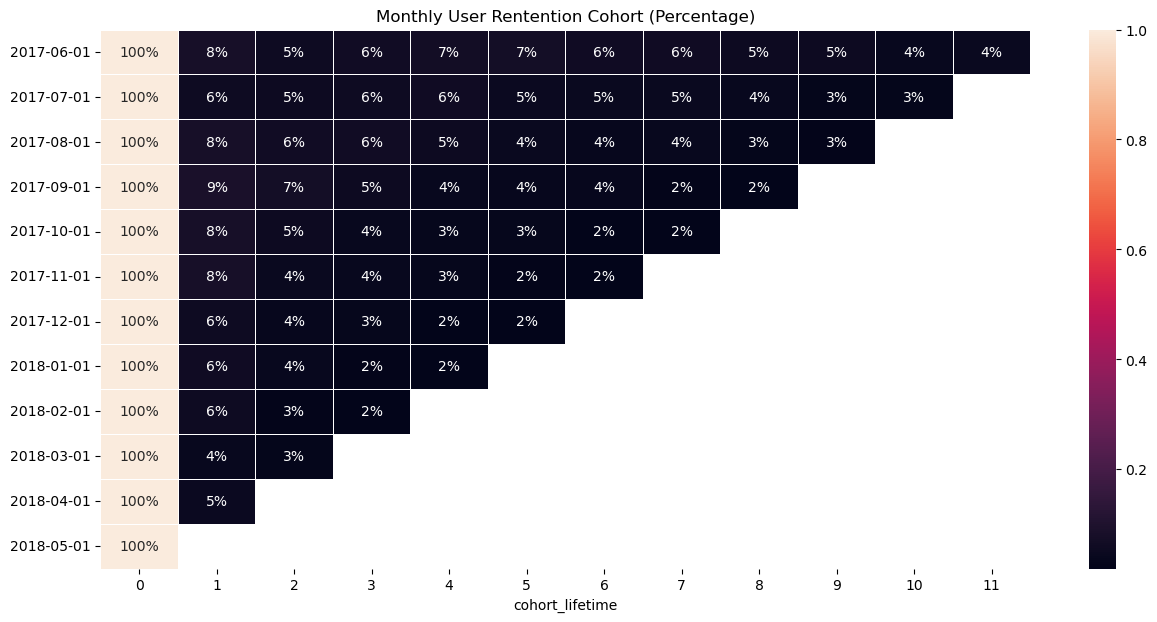

In [48]:
#plotting a heatmap in percentages to make more visual sense 
plt.figure(figsize=(15,7))
plt.title('Monthly User Rentention Cohort (Percentage)')
sns.heatmap(retention, annot=True, linewidth=.5, fmt='.0%');

In [49]:
print('On average, {0:.0%} of users come back in the following month after their first visit.'.format(retention[1].mean())) 

On average, 7% of users come back in the following month after their first visit.


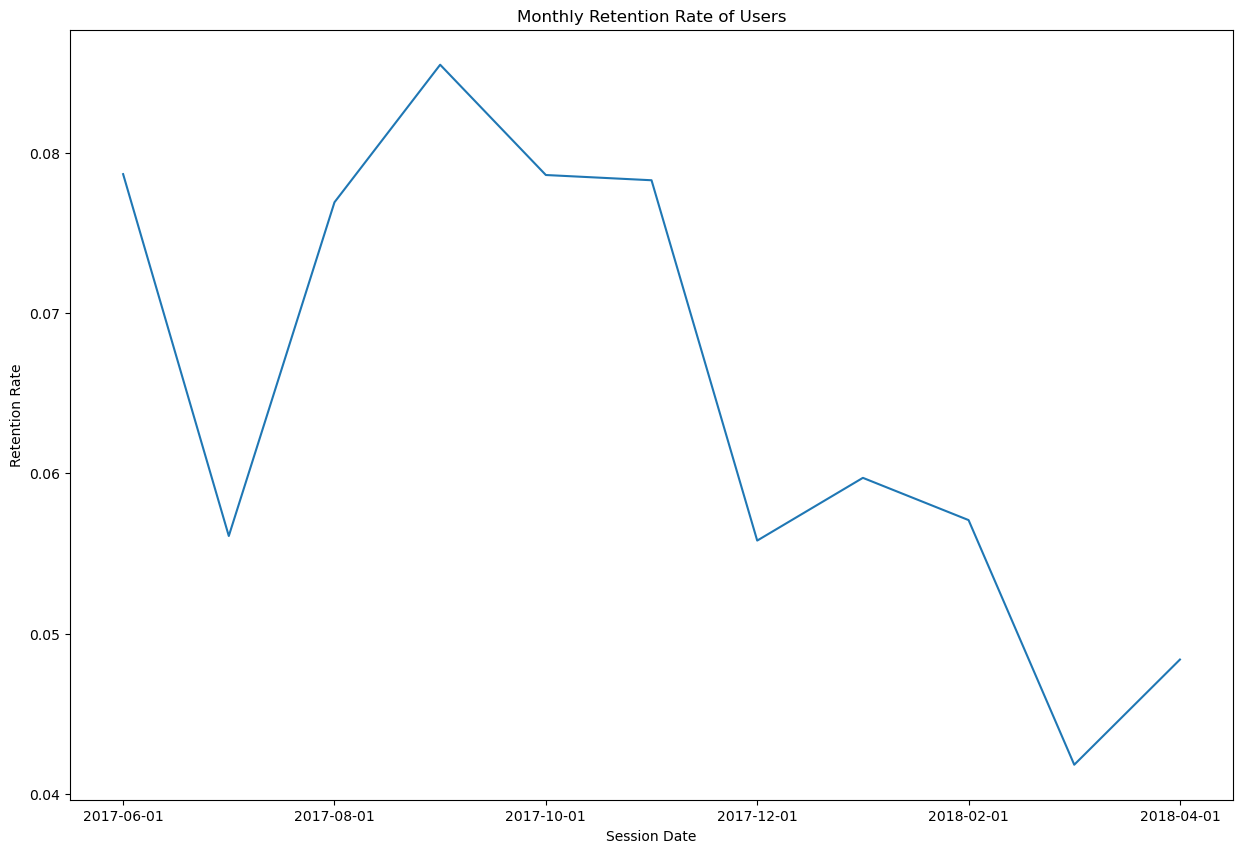

In [50]:
#plotting the monthly retention of users 
plt.figure(figsize=(15, 10))
retention[1].plot(kind='line')
plt.xlabel('Session Date')
plt.ylabel('Retention Rate')
plt.title('Monthly Retention Rate of Users');

#### The overall user retention rate is below 10% with an average of 7% coming back each month. The retention rate is higher in September, possibly anticipating Black Friday Sales. The retention rate dips after November, a slight peak is observed in January, then dips again. We should aim for a higher retention rate.

### Key Performance Indicator (KPI) Analysis

In [51]:
#finding when people start buying
orders.head()

buy_ts  revenue                   uid order_month order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 2017-06-01

In [52]:
# retrieving the date of the first order for each customer
first_order_date = orders.groupby('uid')['order_date'].min().reset_index()
# renaming the column to avoid repetitions in column names
first_order_date.columns = ['uid', 'first_order_date'] 
# adding date of the first order to 'orders' table by merging two tables
orders_1 = orders[['uid', 'revenue', 'order_month', 'order_date']].merge(first_order_date, on='uid')
# checking the result
orders_1.head()

uid  revenue order_month order_date first_order_date
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01

In [53]:
# dropping duplicate rows based on the 'uid' column in the 'visits' table to avoid duplicates in merged table
visits_1 = visits.drop_duplicates(subset='uid')
# merging the 'orders_1' and 'visits_1' tables
orders_purchase = orders_1.merge(visits_1[['uid','first_session_date', 'source_id', 'device']], on='uid')
# checking the result
orders_purchase.head()

uid  revenue order_month order_date first_order_date  \
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   

  first_session_date  source_id   device  
0         2017-06-01          1  desktop  
1         2017-06-01          2  desktop  
2         2017-06-01          2  desktop  
3         2017-06-01          2  desktop  
4         2017-06-01          3  desktop

In [54]:
#calculate the time between first session (first visit) and first purchase (conversion time)
# creating a new column in 'orders_1' with calculated conversion time
orders_purchase['conversion'] = ((pd.to_datetime(orders_purchase['first_order_date'])
                                  - pd.to_datetime(orders_purchase['first_session_date']))
                                  / np.timedelta64(1,'D')).astype('int')
# checking the result
orders_purchase.head()

uid  revenue order_month order_date first_order_date  \
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   

  first_session_date  source_id   device  conversion  
0         2017-06-01          1  desktop           0  
1         2017-06-01          2  desktop           0  
2         2017-06-01          2  desktop           0  
3         2017-06-01          2  desktop           0  
4         2017-06-01          3  desktop           0

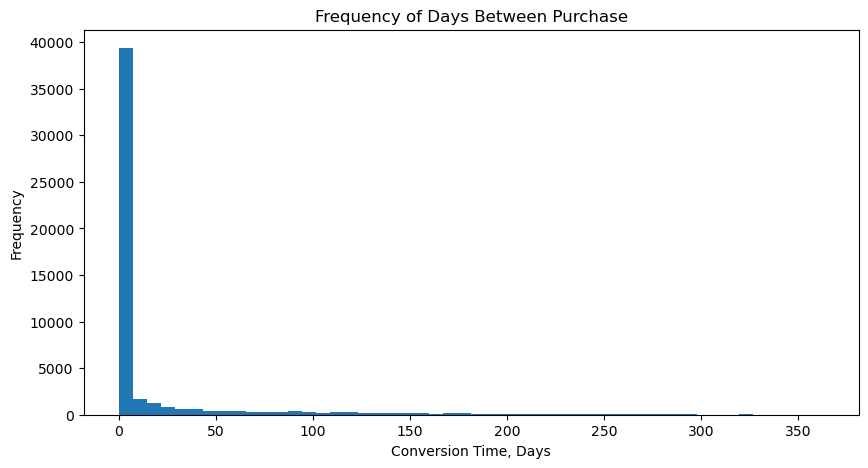

In [55]:
#graphing the frequency of days between purchase
orders_purchase['conversion'].plot(kind='hist', bins=50, figsize=(10,5))
plt.xlabel('Conversion Time, Days')
plt.grid(False) 
plt.title('Frequency of Days Between Purchase');

In [56]:
# analysing conversion time values
orders_purchase['conversion'].describe()

count    50415.000000
mean        17.611227
std         46.469172
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        363.000000
Name: conversion, dtype: float64

#### The median days between purchase is 0 days, while the mean is 17.6. There are some outliers that come back later in the year. 

In [57]:
# calculating average conversion time
orders_purchase['conversion'].mode()

0    0
Name: conversion, dtype: int32

In [58]:
#calculating overall conversion rate 
# calculating overall conversion rate
# dividing number of users who make an order by total number of users
print(' The overall conversion rate is {:.2%}'.format(orders_purchase['uid'].nunique()/visits['uid'].nunique()))

 The overall conversion rate is 16.01%


#### People tend to buy during their initial visit and the overall conversion rate is 16%. 

In [59]:
orders_purchase.head()

uid  revenue order_month order_date first_order_date  \
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   

  first_session_date  source_id   device  conversion  
0         2017-06-01          1  desktop           0  
1         2017-06-01          2  desktop           0  
2         2017-06-01          2  desktop           0  
3         2017-06-01          2  desktop           0  
4         2017-06-01          3  desktop           0

In [60]:
# Perform cohort analysis on first purchase. Split data into cohorts based on first order  

first_purchase_cohort = orders_purchase.pivot_table(index='first_order_date',
                  columns='conversion',
                  values='uid',
                  aggfunc='nunique')
first_purchase_cohort

conversion          0     1    2    3    4    5    6    7    8    9    ...  \
first_order_date                                                       ...   
2017-06-01         86.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2017-06-02         87.0  10.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2017-06-03         52.0   1.0  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2017-06-04         52.0   2.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2017-06-05        123.0   5.0  1.0  5.0  7.0  NaN  NaN  NaN  NaN  NaN  ...   
...                 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-05-28         88.0   2.0  4.0  2.0  NaN  NaN  1.0  3.0  NaN  NaN  ...   
2018-05-29         82.0   7.0  3.0  NaN  2.0  NaN  2.0  1.0  NaN  NaN  ...   
2018-05-30        104.0   2.0  2.0  NaN  2.0  1.0  1.0  NaN  NaN  NaN  ...   
2018-05-31        334.0  66.0  3.0  4.0  2.0  NaN  1.0  3.0  2.0  1.0  ...   
2018-06-01          NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

conversion        348  349  350  352  353  355  356  357  358  363  
first_order_date                                                    
2017-06-01        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-06-02        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-06-03        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-06-04        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2017-06-05        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2018-05-28        NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  NaN  NaN  
2018-05-29        NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  
2018-05-30        NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  
2018-05-31        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  
2018-06-01        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[364 rows x 349 columns]

In [61]:
# Replace missing values
first_purchase_cohort.fillna('')

conversion          0     1    2    3    4    5    6    7    8    9    ...  \
first_order_date                                                       ...   
2017-06-01         86.0                                                ...   
2017-06-02         87.0  10.0                                          ...   
2017-06-03         52.0   1.0  4.0                                     ...   
2017-06-04         52.0   2.0  1.0                                     ...   
2017-06-05        123.0   5.0  1.0  5.0  7.0                           ...   
...                 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2018-05-28         88.0   2.0  4.0  2.0            1.0  3.0            ...   
2018-05-29         82.0   7.0  3.0       2.0       2.0  1.0            ...   
2018-05-30        104.0   2.0  2.0       2.0  1.0  1.0                 ...   
2018-05-31        334.0  66.0  3.0  4.0  2.0       1.0  3.0  2.0  1.0  ...   
2018-06-01                1.0                                          ...   

conversion       348 349 350 352 353  355  356  357  358  363  
first_order_date                                               
2017-06-01                                                     
2017-06-02                                                     
2017-06-03                                                     
2017-06-04                                                     
2017-06-05                                                     
...               ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  
2018-05-28                            1.0  1.0  1.0            
2018-05-29                                 1.0  1.0            
2018-05-30                                      1.0       1.0  
2018-05-31                                           1.0  1.0  
2018-06-01                                                     

[364 rows x 349 columns]

In [62]:
#calculating retention rate of buyers 
retention_rate_buyers = pd.DataFrame()
for col in first_purchase_cohort.columns:
    retention_rate_buyers = pd.concat([retention_rate_buyers, first_purchase_cohort[col]/first_purchase_cohort[0]], axis=1)
retention_rate_buyers.columns = first_purchase_cohort.columns
retention_rate_buyers.fillna('')

conversion  0         1         2         3         4         5         6    \
2017-06-01  1.0                                                               
2017-06-02  1.0  0.114943                                                     
2017-06-03  1.0  0.019231  0.076923                                           
2017-06-04  1.0  0.038462  0.019231                                           
2017-06-05  1.0   0.04065   0.00813   0.04065  0.056911                       
...         ...       ...       ...       ...       ...       ...       ...   
2018-05-28  1.0  0.022727  0.045455  0.022727                      0.011364   
2018-05-29  1.0  0.085366  0.036585             0.02439             0.02439   
2018-05-30  1.0  0.019231  0.019231            0.019231  0.009615  0.009615   
2018-05-31  1.0  0.197605  0.008982  0.011976  0.005988            0.002994   
2018-06-01                                                                    

conversion       7         8         9    ... 348 349 350 352 353       355  \
2017-06-01                                ...                                 
2017-06-02                                ...                                 
2017-06-03                                ...                                 
2017-06-04                                ...                                 
2017-06-05                                ...                                 
...              ...       ...       ...  ...  ..  ..  ..  ..  ..       ...   
2018-05-28  0.034091                      ...                      0.011364   
2018-05-29  0.012195                      ...                                 
2018-05-30                                ...                                 
2018-05-31  0.008982  0.005988  0.002994  ...                                 
2018-06-01                                ...                                 

conversion       356       357       358       363  
2017-06-01                                          
2017-06-02                                          
2017-06-03                                          
2017-06-04                                          
2017-06-05                                          
...              ...       ...       ...       ...  
2018-05-28  0.011364  0.011364                      
2018-05-29  0.012195  0.012195                      
2018-05-30            0.009615            0.009615  
2018-05-31                      0.002994  0.002994  
2018-06-01                                          

[364 rows x 349 columns]

In [63]:
#What is the percentage of users coming back to purchase?

print('On average, {0:.0%} of users come back in the following day to purchase after their first visit.'.format(retention_rate_buyers[1].mean())) 

On average, 8% of users come back in the following day to purchase after their first visit.


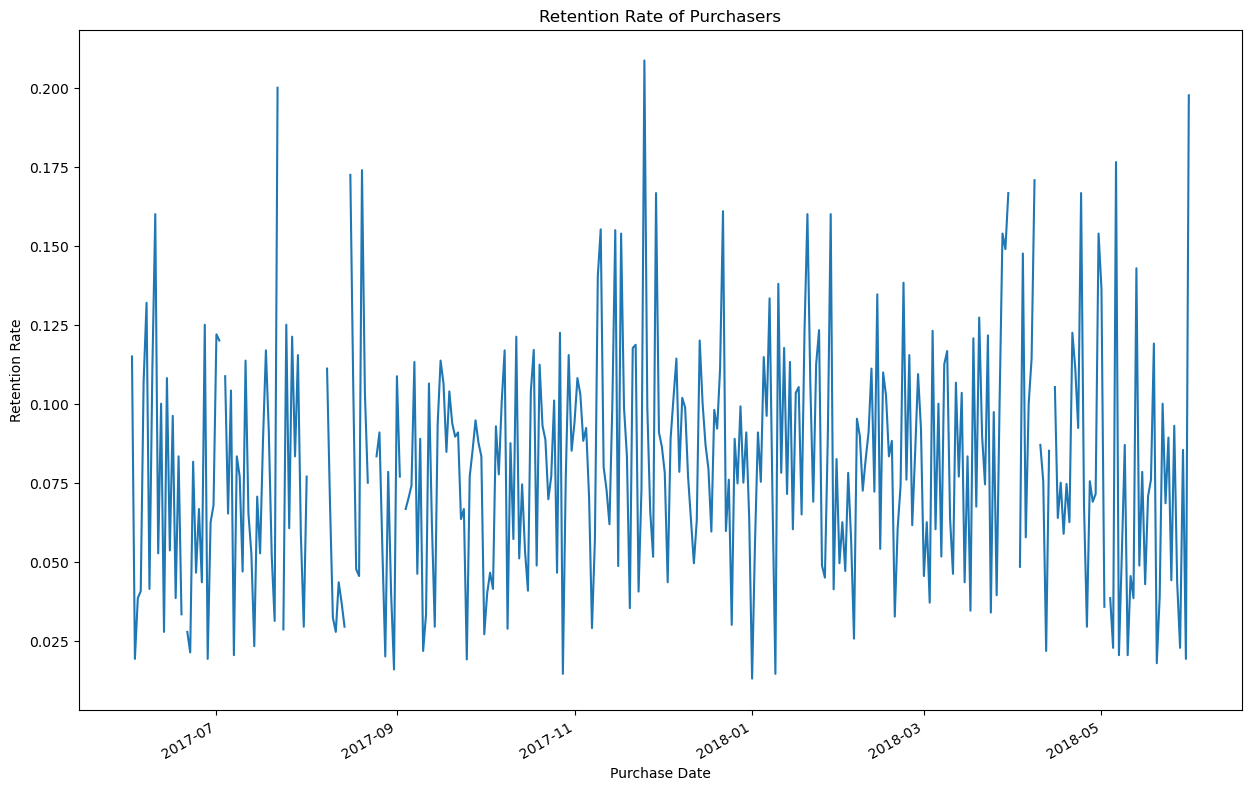

In [64]:
#plotting the rententation rate of purchasers
plt.figure(figsize=(15, 10))
retention_rate_buyers[1].plot(kind='line', grid=False)
plt.xlabel('Purchase Date')
plt.ylabel('Retention Rate')
plt.title('Retention Rate of Purchasers');

#### We would like to see more than 8% coming back to purchase. 

In [65]:
# extracting cohort month (first order month) from first order date
# adding results to the new column in orders_1 table
orders_purchase['order_cohort_month'] = orders_purchase['first_order_date'].astype('datetime64[M]')
orders_purchase.head()

uid  revenue order_month order_date first_order_date  \
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   

  first_session_date  source_id   device  conversion order_cohort_month  
0         2017-06-01          1  desktop           0         2017-06-01  
1         2017-06-01          2  desktop           0         2017-06-01  
2         2017-06-01          2  desktop           0         2017-06-01  
3         2017-06-01          2  desktop           0         2017-06-01  
4         2017-06-01          3  desktop           0         2017-06-01

In [66]:
# calculating cohort size (the number of unique users in each order cohort month)
cohort_size = orders_purchase.groupby('order_cohort_month').agg({'uid':'nunique'}).reset_index()
# giving names to colummns
cohort_size.columns = ['order_cohort_month', 'cohort_size']
cohort_size

order_cohort_month  cohort_size
0          2017-06-01         2023
1          2017-07-01         1923
2          2017-08-01         1370
3          2017-09-01         2581
4          2017-10-01         4340
5          2017-11-01         4081
6          2017-12-01         4383
7          2018-01-01         3373
8          2018-02-01         3651
9          2018-03-01         3533
10         2018-04-01         2276
11         2018-05-01         2988
12         2018-06-01            1

In [67]:
# calculating the number of orders for cohort and order month
cohort = orders_purchase.groupby(['order_cohort_month','order_month'])['revenue'].count().reset_index()
# giving names to colummns
cohort.columns = ['order_cohort_month','order_month','n_orders']
cohort.head()

order_cohort_month order_month  n_orders
0         2017-06-01  2017-06-01      2354
1         2017-06-01  2017-07-01       177
2         2017-06-01  2017-08-01       174
3         2017-06-01  2017-09-01       226
4         2017-06-01  2017-10-01       292

In [68]:
# merging 'cohort' and 'cohort_size' together
cohort = cohort.merge(cohort_size,on=['order_cohort_month'])
# calculating order cohort lifetime in months
# storing the results to a new column 'order_cohort_month'
cohort['order_cohort_lifetime'] = ((cohort['order_month'] - cohort['order_cohort_month']) / np.timedelta64(1,'M')).round().astype(int)
# calculating how many orders do users make during a month, 
# dividing the number of orders at a certain lifetime month for each cohort by the number of users in the cohort
cohort['orders_per_buyer'] = cohort['n_orders'] / cohort['cohort_size']
cohort.head()

order_cohort_month order_month  n_orders  cohort_size  \
0         2017-06-01  2017-06-01      2354         2023   
1         2017-06-01  2017-07-01       177         2023   
2         2017-06-01  2017-08-01       174         2023   
3         2017-06-01  2017-09-01       226         2023   
4         2017-06-01  2017-10-01       292         2023   

   order_cohort_lifetime  orders_per_buyer  
0                      0          1.163618  
1                      1          0.087494  
2                      2          0.086011  
3                      3          0.111715  
4                      4          0.144340

In [69]:
# creating a pivot table with cumulative sum of orders per buyer
orders_cohort_pivot = cohort.pivot_table(index='order_cohort_month', 
                                  columns='order_cohort_lifetime',
                                  values='orders_per_buyer',
                                  aggfunc='sum').cumsum(axis=1)

# calculating the overall average check
total_revenue = orders_cohort_pivot.mean(axis=1).mean()
print('The overall average check is: ', round(total_revenue, 2))

The overall average check is:  1.28


In [70]:
orders_cohort_pivot

order_cohort_lifetime        0         1         2         3         4   \
order_cohort_month                                                        
2017-06-01             1.163618  1.251112  1.337123  1.448838  1.593178   
2017-07-01             1.136765  1.188768  1.251170  1.305252  1.342694   
2017-08-01             1.118978  1.197810  1.270803  1.329927  1.391971   
2017-09-01             1.136381  1.221232  1.283611  1.347152  1.373111   
2017-10-01             1.143779  1.216129  1.253456  1.281567  1.311290   
2017-11-01             1.179368  1.276648  1.321245  1.372948  1.406273   
2017-12-01             1.152635  1.214237  1.260324  1.301164  1.320785   
2018-01-01             1.121554  1.187963  1.235102  1.254076  1.277201   
2018-02-01             1.121611  1.182416  1.205149  1.224322       NaN   
2018-03-01             1.168978  1.219360  1.269176       NaN       NaN   
2018-04-01             1.096221  1.181898       NaN       NaN       NaN   
2018-05-01             1.087349       NaN       NaN       NaN       NaN   
2018-06-01             1.000000       NaN       NaN       NaN       NaN   

order_cohort_lifetime        5         6         7         8         9   \
order_cohort_month                                                        
2017-06-01             1.700939  1.837370  1.923381  2.028176  2.103806   
2017-07-01             1.385335  1.417057  1.443058  1.473219  1.485699   
2017-08-01             1.437226  1.472993  1.529927  1.563504  1.597080   
2017-09-01             1.415343  1.457187  1.478884  1.502518       NaN   
2017-10-01             1.335023  1.354839  1.383641       NaN       NaN   
2017-11-01             1.420730  1.445724       NaN       NaN       NaN   
2017-12-01             1.344741       NaN       NaN       NaN       NaN   
2018-01-01                  NaN       NaN       NaN       NaN       NaN   
2018-02-01                  NaN       NaN       NaN       NaN       NaN   
2018-03-01                  NaN       NaN       NaN       NaN       NaN   
2018-04-01                  NaN       NaN       NaN       NaN       NaN   
2018-05-01                  NaN       NaN       NaN       NaN       NaN   
2018-06-01                  NaN       NaN       NaN       NaN       NaN   

order_cohort_lifetime        10        11  
order_cohort_month                         
2017-06-01             2.151261  2.193772  
2017-07-01             1.513261       NaN  
2017-08-01                  NaN       NaN  
2017-09-01                  NaN       NaN  
2017-10-01                  NaN       NaN  
2017-11-01                  NaN       NaN  
2017-12-01                  NaN       NaN  
2018-01-01                  NaN       NaN  
2018-02-01                  NaN       NaN  
2018-03-01                  NaN       NaN  
2018-04-01                  NaN       NaN  
2018-05-01                  NaN       NaN  
2018-06-01                  NaN       NaN

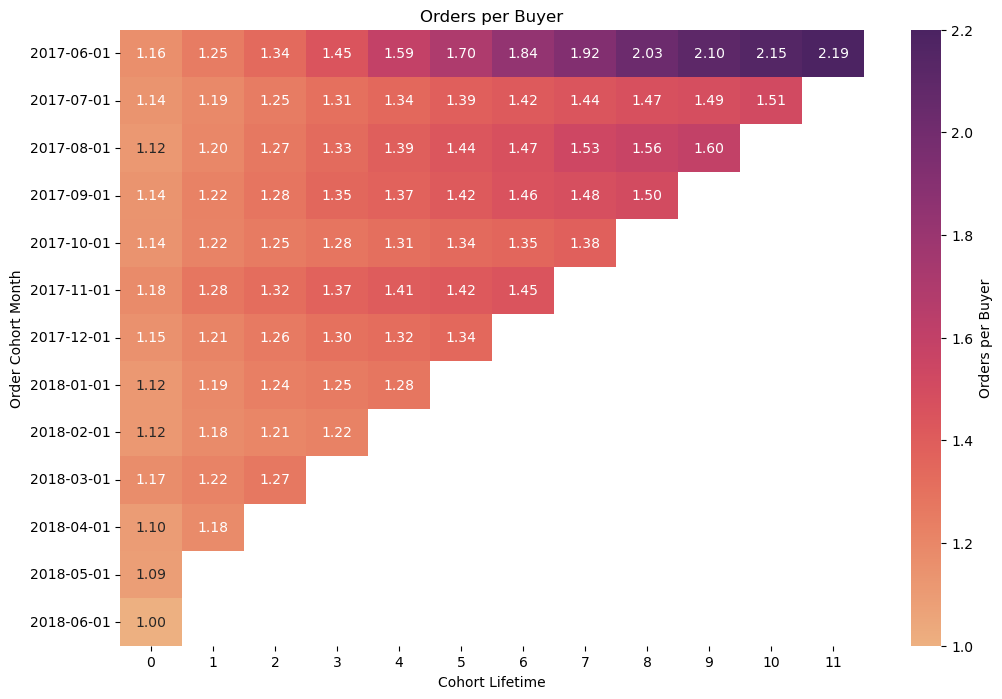

In [71]:
# converting the values to numeric type
orders_cohort_pivot = orders_cohort_pivot.astype(float)
# converting the index to string for a nicer output
orders_cohort_pivot.index = orders_cohort_pivot.index.astype(str)
# plotting the heatmap of cumulative sum of orders per buyer
plt.figure(figsize=(12, 8))
sns.heatmap(orders_cohort_pivot,
    annot=True,
    fmt='.2f',
    cmap='flare',
    vmin=1,
    vmax=2.2,
    cbar_kws={'label': 'Orders per Buyer'})
# setting the title and axis labels
plt.title('Orders per Buyer')
plt.xlabel('Cohort Lifetime')
plt.ylabel('Order Cohort Month')
plt.show()

The orders per buyer for each cohort steadily increases which is a good sign that shows customer loyalty as they are returning for purchases.

In [72]:
# plotting a histogram 'Average Revenue From the Order'
avg_check = px.histogram(orders_purchase,
                   x='revenue',)
# giving names to histogram and axes
avg_check.update_layout(title='Frequency of Orders',
                    title_x=0.5,
                    xaxis_title='Revenue',
                    yaxis_title='Frequency')
# setting x-axis range
avg_check.update_xaxes(range=[0, orders_1['revenue'].max()+1])
avg_check.show()

In [73]:
# analysing revenue values
orders_purchase['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [74]:
orders_purchase['revenue'].mode()

0    1.83
Name: revenue, dtype: float64

#### Since the distribution was abnormal, we used the mode to calcuate the average revenue per order is 1.83.

In [75]:
# calculating average check for each cohort and order month
avg_cohort = orders_purchase.groupby(['order_cohort_month','order_month'])['revenue'].mean().reset_index()
# calculating cohort lifetime
avg_cohort['cohort_lifetime'] = ((avg_cohort['order_month'] - 
                                        avg_cohort['order_cohort_month']) /
                                       np.timedelta64(1,'M')).round().astype(int)
avg_cohort.head()

order_cohort_month order_month   revenue  cohort_lifetime
0         2017-06-01  2017-06-01  4.060106                0
1         2017-06-01  2017-07-01  5.547006                1
2         2017-06-01  2017-08-01  5.088161                2
3         2017-06-01  2017-09-01  8.545575                3
4         2017-06-01  2017-10-01  7.084178                4

In [76]:
# creating a pivot table with average check for each cohort lifetime
avg_cohort_pivot = avg_cohort.pivot_table(index='order_cohort_month', 
                                         columns='cohort_lifetime', 
                                         values='revenue', 
                                         aggfunc='mean')

# calculating the overall average check
#total_revenue = avg_cohort_pivot.median(axis=1).mean()
total_revenue = avg_cohort['revenue'].median()
print('The overall average purchase is: ', round(total_revenue, 2))

The overall average purchase is:  5.65


In [77]:
avg_cohort_pivot

cohort_lifetime           0          1          2          3          4   \
order_cohort_month                                                         
2017-06-01          4.060106   5.547006   5.088161   8.545575   7.084178   
2017-07-01          5.287123   6.446100   9.992083   6.637596   4.721806   
2017-08-01          4.715479   5.987315   6.281200   6.617901   7.962941   
2017-09-01          4.967109  13.171187   8.351056  62.570244  15.430448   
2017-10-01          4.374738   7.405127   5.127469   5.590246   5.098992   
2017-11-01          4.370717   4.103955   4.474670   6.284976   4.441471   
2017-12-01          4.110746   4.226741  20.072772  26.084358  15.948488   
2018-01-01          3.687417   4.438482   6.454969   7.524844   2.711282   
2018-02-01          3.706266   4.576486   3.453735   3.867143        NaN   
2018-03-01          4.139344   5.972191   6.334489        NaN        NaN   
2018-04-01          4.248774   6.204718        NaN        NaN        NaN   
2018-05-01          4.286168        NaN        NaN        NaN        NaN   
2018-06-01          3.420000        NaN        NaN        NaN        NaN   

cohort_lifetime            5          6          7         8          9   \
order_cohort_month                                                         
2017-06-01           6.825321   6.966449   6.761839  5.279009   8.009869   
2017-07-01           3.659512   3.789508   5.454400  5.345690  11.790000   
2017-08-01           6.265323   5.890000   7.113590  8.702826   5.598478   
2017-09-01          15.321835  16.767130  11.206607  7.785574        NaN   
2017-10-01           5.071553   4.280233   4.009120       NaN        NaN   
2017-11-01           3.726780   4.598235        NaN       NaN        NaN   
2017-12-01          14.111048        NaN        NaN       NaN        NaN   
2018-01-01                NaN        NaN        NaN       NaN        NaN   
2018-02-01                NaN        NaN        NaN       NaN        NaN   
2018-03-01                NaN        NaN        NaN       NaN        NaN   
2018-04-01                NaN        NaN        NaN       NaN        NaN   
2018-05-01                NaN        NaN        NaN       NaN        NaN   
2018-06-01                NaN        NaN        NaN       NaN        NaN   

cohort_lifetime            10        11  
order_cohort_month                       
2017-06-01          12.038125  6.042093  
2017-07-01           5.648302       NaN  
2017-08-01                NaN       NaN  
2017-09-01                NaN       NaN  
2017-10-01                NaN       NaN  
2017-11-01                NaN       NaN  
2017-12-01                NaN       NaN  
2018-01-01                NaN       NaN  
2018-02-01                NaN       NaN  
2018-03-01                NaN       NaN  
2018-04-01                NaN       NaN  
2018-05-01                NaN       NaN  
2018-06-01                NaN       NaN

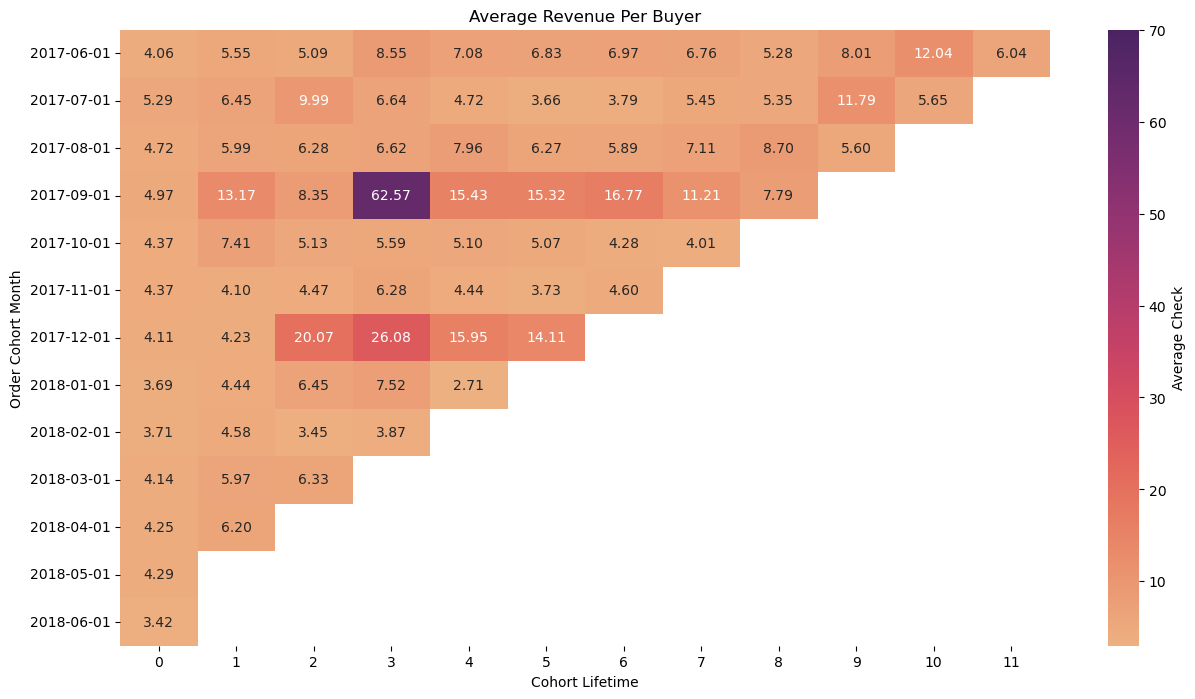

In [78]:
# converting the values to numeric type
avg_cohort_pivot = avg_cohort_pivot.astype(float)
# converting the index to string for a nicer output
avg_cohort_pivot.index = avg_cohort_pivot.index.astype(str)
# plotting the heatmap of average check
plt.figure(figsize=(15, 8))
sns.heatmap(avg_cohort_pivot,
    annot=True,
    fmt='.2f',
    cmap='flare',
    vmin=3,
    vmax=70,
    cbar_kws={'label': 'Average Check'})
# setting the title and axis labels
plt.title('Average Revenue Per Buyer')
plt.xlabel('Cohort Lifetime')
plt.ylabel('Order Cohort Month')
plt.show()

September cohort seems to do very well followed by December. 

In [79]:
# calculating average monthly revenue
avg_cohort_1 = avg_cohort.groupby('order_month')['revenue'].mean().reset_index()
# renaming the columns
avg_cohort_1.columns = ['order_month', 'avg_check']
avg_cohort_1

order_month  avg_check
0   2017-06-01   4.060106
1   2017-07-01   5.417064
2   2017-08-01   5.416580
3   2017-09-01   7.373021
4   2017-10-01   7.509780
5   2017-11-01   6.381988
6   2017-12-01  13.500188
7   2018-01-01   6.278274
8   2018-02-01   7.949637
9   2018-03-01   8.800446
10  2018-04-01   8.081146
11  2018-05-01   5.933054
12  2018-06-01   3.420000

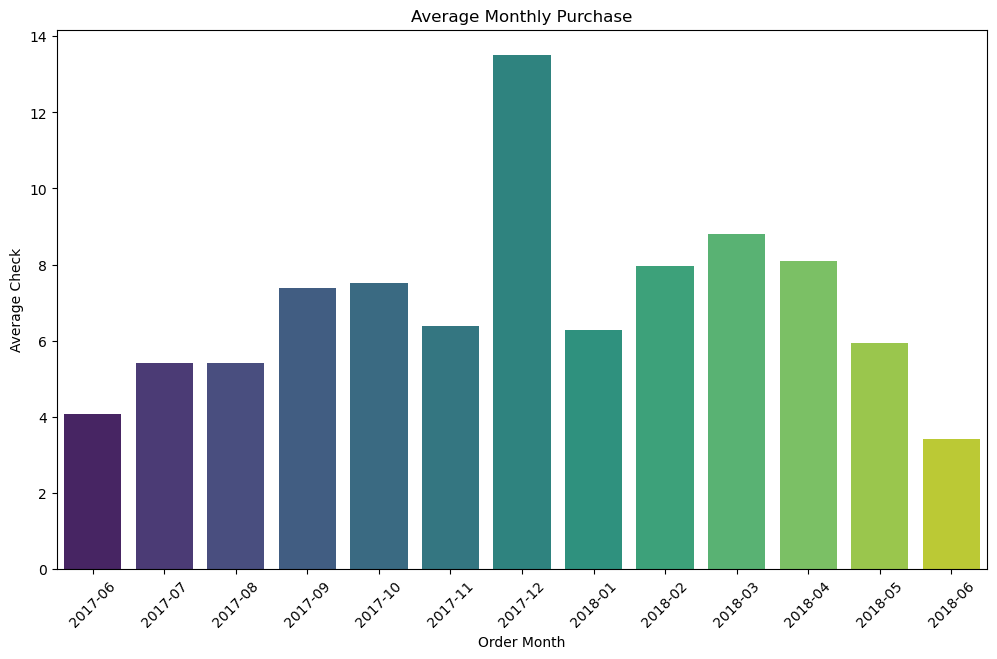

In [80]:
# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='order_month', y='avg_check', data=avg_cohort_1, palette='viridis')

# Format x-axis labels
ax.set_xticklabels([date.strftime('%Y-%m') for date in avg_cohort_1['order_month']], rotation=45)

plt.xlabel('Order Month')
plt.ylabel('Average Check')
plt.title('Average Monthly Purchase')
plt.show()

The highest average orders occur during December possibly due to holiday seasons. The lowest average orders occur during June which may be due to less sales or holidays. 

### Analyzing Orders Over Time

In [81]:
#finding orders during a given period of time
orders.head()

buy_ts  revenue                   uid order_month order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 2017-06-01
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 2017-06-01
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 2017-06-01
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 2017-06-01
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 2017-06-01

In [82]:
#finding revenue per session 
rev_per_sess = orders.groupby(['buy_ts', 'uid'])['revenue'].sum().reset_index()
rev_per_sess

buy_ts                   uid  revenue
0     2017-06-01 00:10:00  10329302124590727494    17.00
1     2017-06-01 00:25:00  11627257723692907447     0.55
2     2017-06-01 00:27:00  17903680561304213844     0.37
3     2017-06-01 00:29:00  16109239769442553005     0.55
4     2017-06-01 07:58:00  14200605875248379450     0.37
...                   ...                   ...      ...
50410 2018-05-31 23:50:00  11369640365507475976     5.80
50411 2018-05-31 23:50:00  12296626599487328624     4.64
50412 2018-05-31 23:54:00   1786462140797698849     0.30
50413 2018-05-31 23:56:00   3993697860786194247     3.67
50414 2018-06-01 00:02:00     83872787173869366     3.42

[50415 rows x 3 columns]

In [83]:
#adding the order day, week, month and year to calculate the overall revenue for the time spans 

rev_per_sess['buy_dt'] = rev_per_sess['buy_ts'].dt.date
rev_per_sess['buy_week'] = rev_per_sess['buy_ts'].astype('datetime64[W]')
rev_per_sess['buy_month'] = rev_per_sess['buy_ts'].astype('datetime64[M]')

In [84]:
rev_per_sess

buy_ts                   uid  revenue      buy_dt  \
0     2017-06-01 00:10:00  10329302124590727494    17.00  2017-06-01   
1     2017-06-01 00:25:00  11627257723692907447     0.55  2017-06-01   
2     2017-06-01 00:27:00  17903680561304213844     0.37  2017-06-01   
3     2017-06-01 00:29:00  16109239769442553005     0.55  2017-06-01   
4     2017-06-01 07:58:00  14200605875248379450     0.37  2017-06-01   
...                   ...                   ...      ...         ...   
50410 2018-05-31 23:50:00  11369640365507475976     5.80  2018-05-31   
50411 2018-05-31 23:50:00  12296626599487328624     4.64  2018-05-31   
50412 2018-05-31 23:54:00   1786462140797698849     0.30  2018-05-31   
50413 2018-05-31 23:56:00   3993697860786194247     3.67  2018-05-31   
50414 2018-06-01 00:02:00     83872787173869366     3.42  2018-06-01   

        buy_week  buy_month  
0     2017-06-01 2017-06-01  
1     2017-06-01 2017-06-01  
2     2017-06-01 2017-06-01  
3     2017-06-01 2017-06-01  
4     2017-06-01 2017-06-01  
...          ...        ...  
50410 2018-05-31 2018-05-01  
50411 2018-05-31 2018-05-01  
50412 2018-05-31 2018-05-01  
50413 2018-05-31 2018-05-01  
50414 2018-05-31 2018-06-01  

[50415 rows x 6 columns]

### Daily Orders and Revenue

In [85]:
#calculating number of purchases and total revenue for each day
sales_daily = rev_per_sess.groupby('buy_dt').agg({'revenue': ['count', 'sum']})
sales_daily

revenue         
             count      sum
buy_dt                     
2017-06-01      96   389.46
2017-06-02     111   324.11
2017-06-03      67   166.48
2017-06-04      66   195.21
2017-06-05     161   441.49
...            ...      ...
2018-05-28     188   740.00
2018-05-29     189   491.06
2018-05-30     208  1021.69
2018-05-31     610  4613.92
2018-06-01       1     3.42

[364 rows x 2 columns]

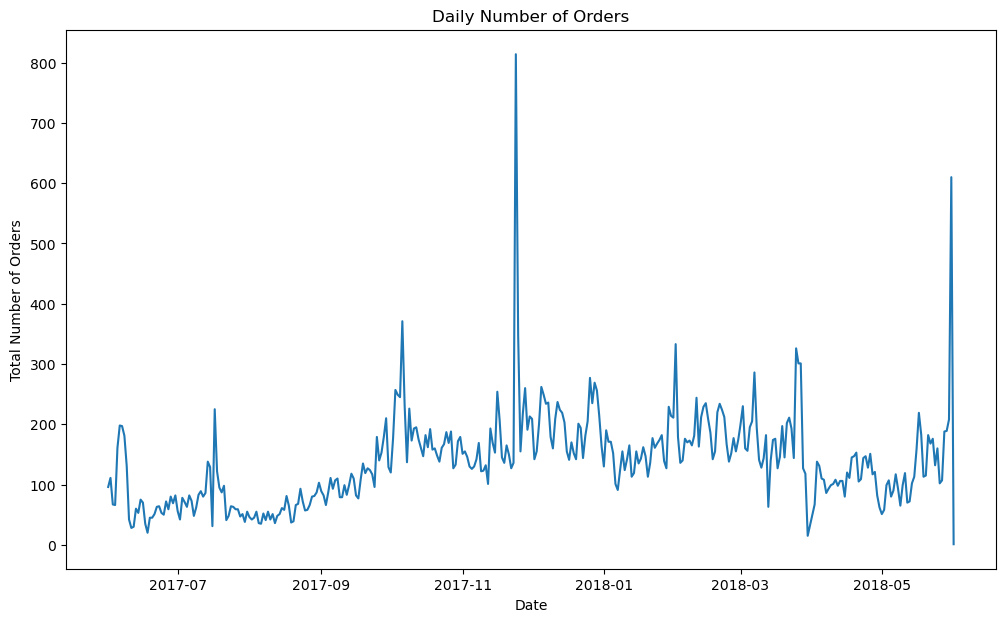

In [86]:
# Create plots for number of daily purchases
sales_daily['revenue']['count'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Total Number of Orders')
plt.title('Daily Number of Orders');

Again, we can see that the highest number of orders happen during December.

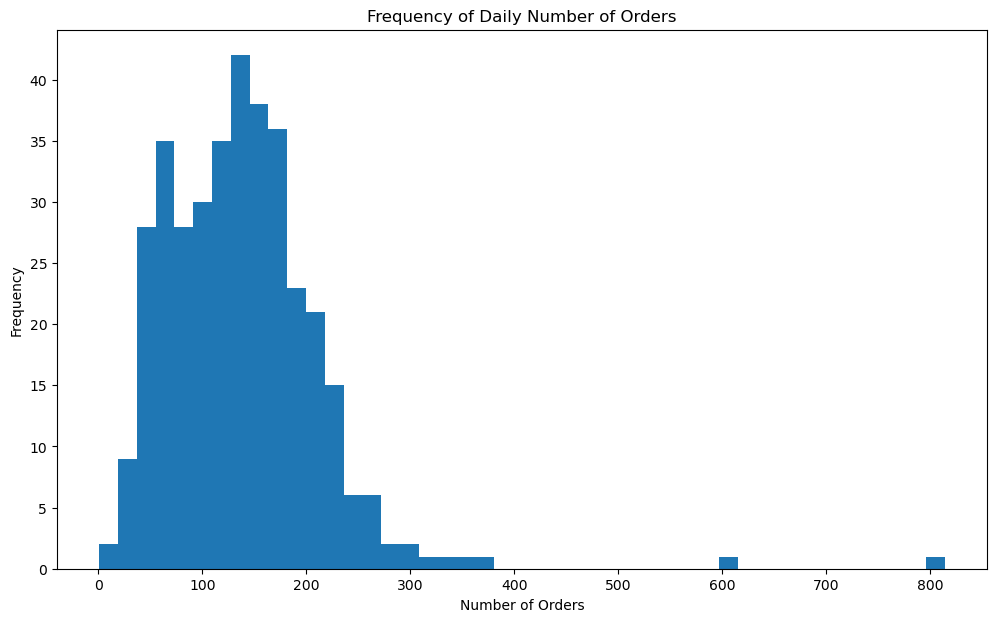

In [87]:
#looking at number of daily purchases in histogram 
sales_daily['revenue']['count'].plot(kind='hist', figsize=(12,7), bins=45)
plt.xlabel('Number of Orders')
plt.title('Frequency of Daily Number of Orders');

The most occuring daily number of orders seems to be 150 orders per day. There are also some outliers of larger purchases that occur which occur in December and May.

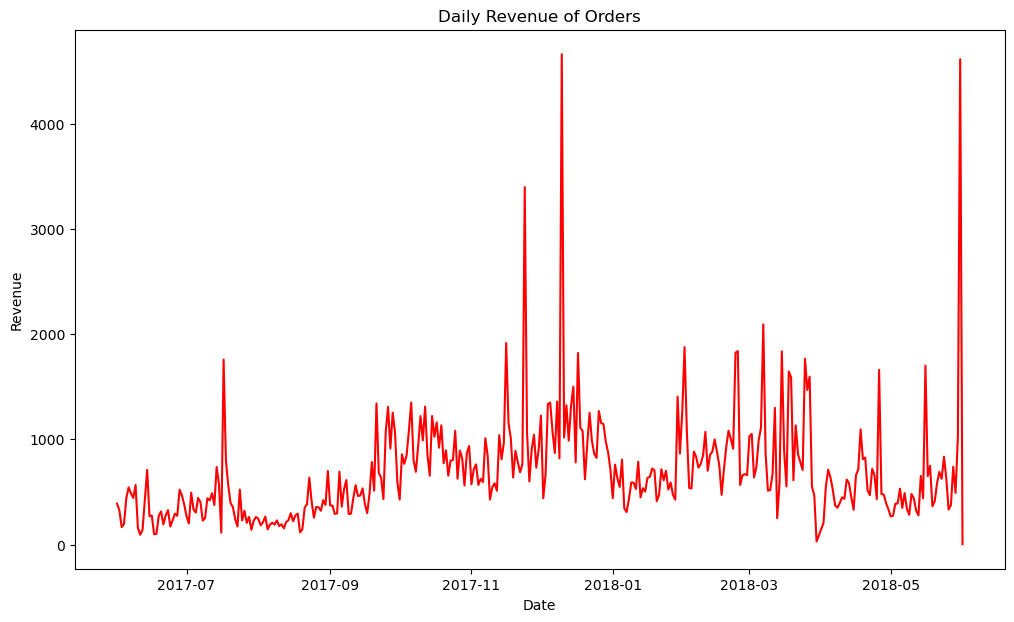

In [88]:
#looking at daily revenue 
sales_daily['revenue']['sum'].plot(figsize=(12,7), color='red')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue of Orders');

There are a few spikes in revenue that happen in July 2017, December, and one large order at the end of May.

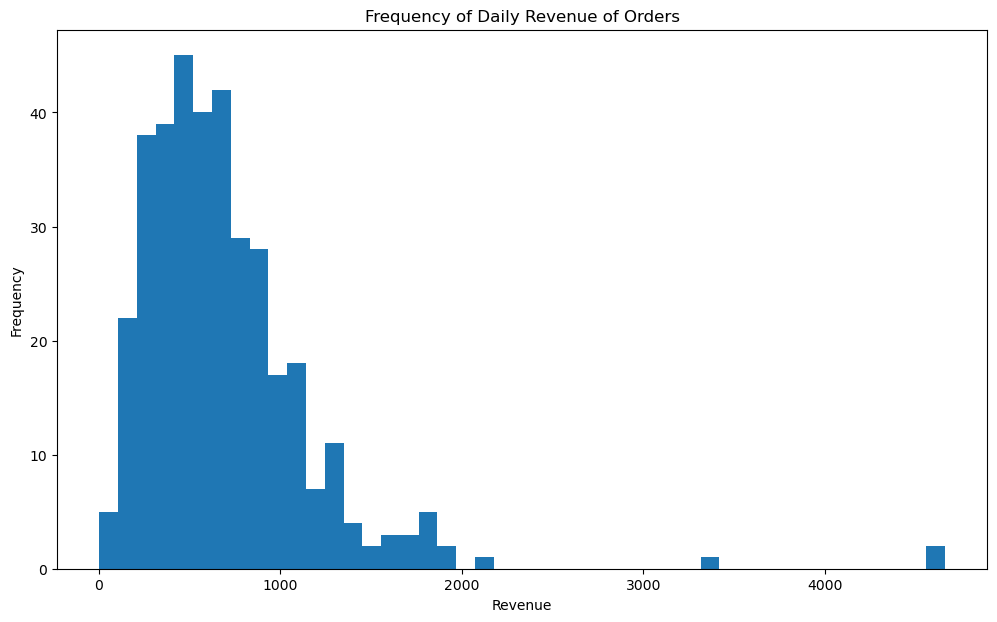

In [89]:
#looking at daily revenue in histogram 
sales_daily['revenue']['sum'].plot(kind='hist', figsize=(12,7), bins=45)
plt.xlabel('Revenue')
plt.title('Frequency of Daily Revenue of Orders');

### Weekly Orders and Revenue

In [90]:
#calculating number of purchases and total revenue for each week
sales_weekly = rev_per_sess.groupby('buy_week').agg({'revenue': ['count', 'sum']})
sales_weekly

revenue          
             count       sum
buy_week                    
2017-06-01     896   2546.66
2017-06-08     525   2536.51
2017-06-15     341   1527.33
2017-06-22     441   2099.22
2017-06-29     461   2449.82
2017-07-06     517   2675.45
2017-07-13     826   4922.39
2017-07-20     460   2240.05
2017-07-27     338   1527.42
2017-08-03     319   1442.06
2017-08-10     347   1487.57
2017-08-17     449   2203.50
2017-08-24     501   2498.44
2017-08-31     631   3082.52
2017-09-07     656   3192.74
2017-09-14     749   3463.39
2017-09-21     936   6386.73
2017-09-28    1321   5820.73
2017-10-05    1575   7080.67
2017-10-12    1214   7153.39
2017-10-19    1119   6143.88
2017-10-26    1119   5281.48
2017-11-02     998   5122.64
2017-11-09     993   4886.65
2017-11-16    1184   7081.91
2017-11-23    2120   8505.21
2017-11-30    1430   6991.56
2017-12-07    1479  11041.61
2017-12-14    1182   8234.70
2017-12-21    1437   7308.66
2017-12-28    1394   5544.85
2018-01-04     918   3618.93
2018-01-11     972   4082.31
2018-01-18    1064   4342.92
2018-01-25    1276   5540.71
2018-02-01    1307   6470.50
2018-02-08    1429   6123.62
2018-02-15    1370   5836.30
2018-02-22    1175   7130.12
2018-03-01    1432   7652.21
2018-03-08     991   4697.54
2018-03-15    1167   8254.26
2018-03-22    1603   7730.24
2018-03-29     469   1968.66
2018-04-05     705   3159.37
2018-04-12     766   4446.76
2018-04-19     933   4436.25
2018-04-26     642   3889.40
2018-05-03     651   2770.33
2018-05-10     734   4312.47
2018-05-17    1156   4073.73
2018-05-24    1086   4423.49
2018-05-31     611   4617.34

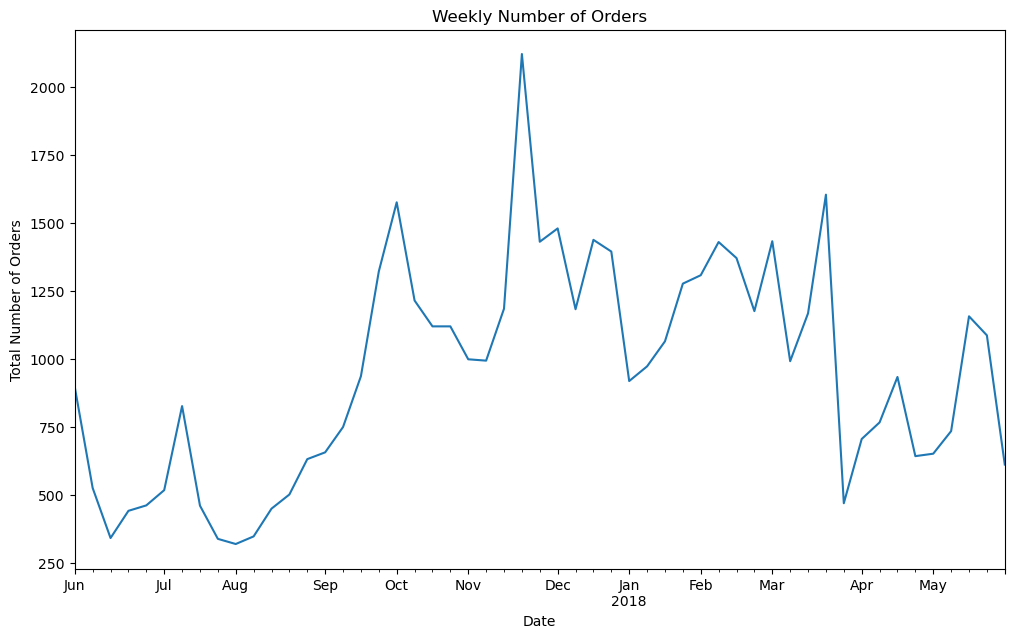

In [91]:
# Create plots for number of weekly purchases
sales_weekly['revenue']['count'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Total Number of Orders')
plt.title('Weekly Number of Orders');

The trend matches the daily number of orders and daily revenue. However, we can gather more definition and see that the peaks in July, October, December, March, and end of May.

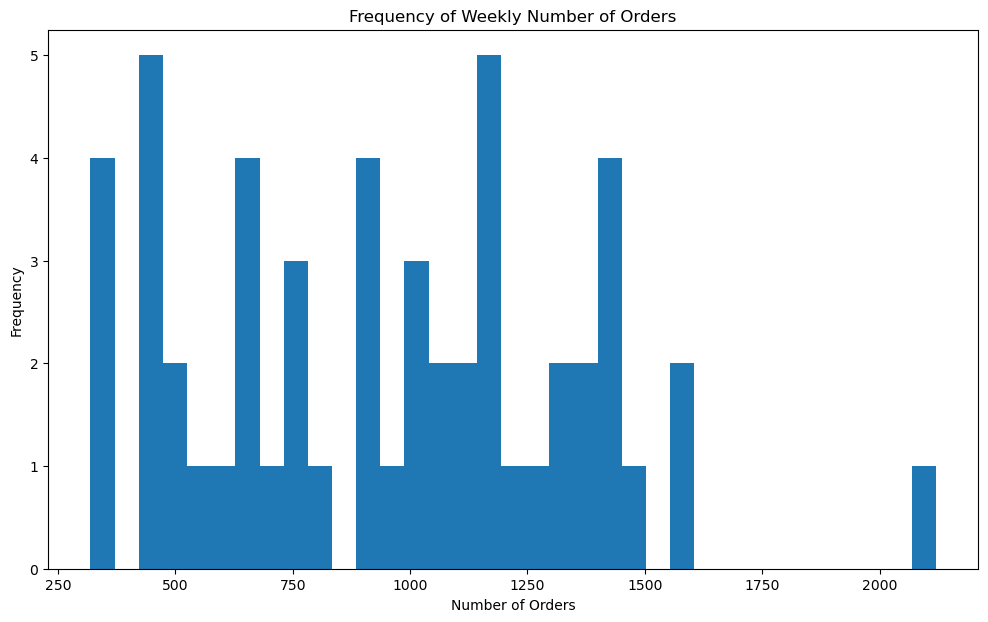

In [92]:
#looking at number of weekly purchases in histogram 
sales_weekly['revenue']['count'].plot(kind='hist', figsize=(12,7), bins=35)
plt.xlabel('Number of Orders')
plt.title('Frequency of Weekly Number of Orders');

On a weekly basis, the orders range from 500- 1100 orders per week.

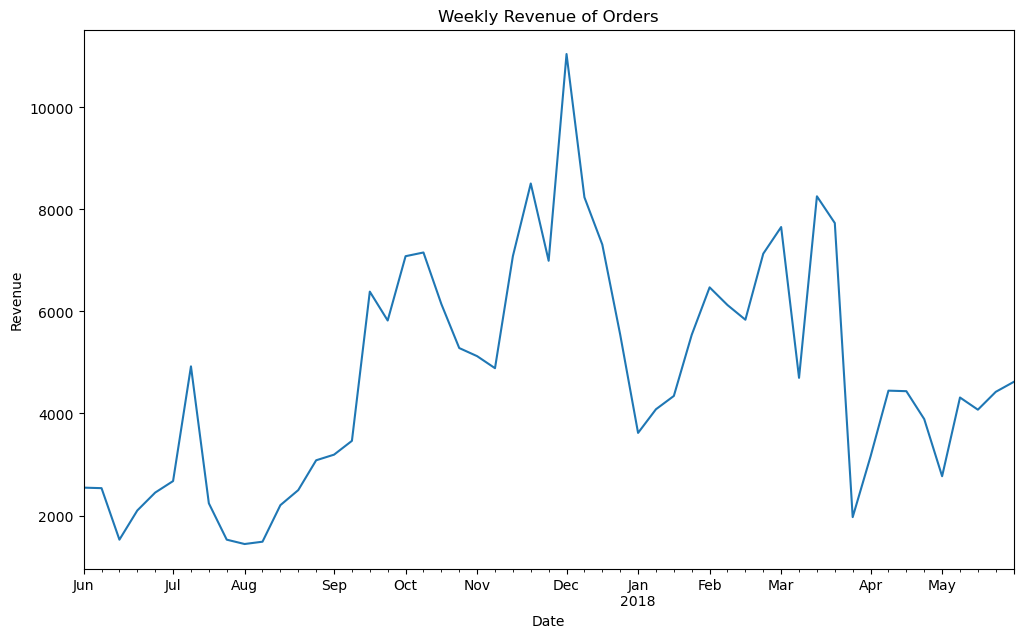

In [93]:
#plotting weekly revenue
sales_weekly['revenue']['sum'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Weekly Revenue of Orders');

The weekly revenue trend also  matches the weekly number or orders trend shown earlier.

In [94]:
rev_per_sess

buy_ts                   uid  revenue      buy_dt  \
0     2017-06-01 00:10:00  10329302124590727494    17.00  2017-06-01   
1     2017-06-01 00:25:00  11627257723692907447     0.55  2017-06-01   
2     2017-06-01 00:27:00  17903680561304213844     0.37  2017-06-01   
3     2017-06-01 00:29:00  16109239769442553005     0.55  2017-06-01   
4     2017-06-01 07:58:00  14200605875248379450     0.37  2017-06-01   
...                   ...                   ...      ...         ...   
50410 2018-05-31 23:50:00  11369640365507475976     5.80  2018-05-31   
50411 2018-05-31 23:50:00  12296626599487328624     4.64  2018-05-31   
50412 2018-05-31 23:54:00   1786462140797698849     0.30  2018-05-31   
50413 2018-05-31 23:56:00   3993697860786194247     3.67  2018-05-31   
50414 2018-06-01 00:02:00     83872787173869366     3.42  2018-06-01   

        buy_week  buy_month  
0     2017-06-01 2017-06-01  
1     2017-06-01 2017-06-01  
2     2017-06-01 2017-06-01  
3     2017-06-01 2017-06-01  
4     2017-06-01 2017-06-01  
...          ...        ...  
50410 2018-05-31 2018-05-01  
50411 2018-05-31 2018-05-01  
50412 2018-05-31 2018-05-01  
50413 2018-05-31 2018-05-01  
50414 2018-05-31 2018-06-01  

[50415 rows x 6 columns]

In [95]:
#finding first purchase date for each customer
first_orders = rev_per_sess.groupby('uid').agg({'buy_ts' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']

first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')
first_orders.head()

uid      first_order_ts first_order_dt first_order_month  \
0   313578113262317 2018-01-03 21:51:00     2018-01-03        2018-01-01   
1  1575281904278712 2017-06-03 10:13:00     2017-06-03        2017-06-01   
2  2429014661409475 2017-10-11 18:33:00     2017-10-11        2017-10-01   
3  2464366381792757 2018-01-28 15:54:00     2018-01-28        2018-01-01   
4  2551852515556206 2017-11-24 10:14:00     2017-11-24        2017-11-01   

  first_order_week  
0       2017-12-28  
1       2017-06-01  
2       2017-10-05  
3       2018-01-25  
4       2017-11-23

In [96]:
#merging first order table with buyers 
buyers = pd.merge(orders_purchase, first_orders, on='uid')
buyers

uid  revenue order_month order_date first_order_date  \
0      10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1      11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2      17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3      16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4      14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   
...                     ...      ...         ...        ...              ...   
50410  12296626599487328624     4.64  2018-05-01 2018-05-31       2018-05-31   
50411  11369640365507475976     5.80  2018-05-01 2018-05-31       2018-05-31   
50412   1786462140797698849     0.30  2018-05-01 2018-05-31       2018-05-31   
50413   3993697860786194247     3.67  2018-05-01 2018-05-31       2018-05-31   
50414     83872787173869366     3.42  2018-06-01 2018-06-01       2018-06-01   

      first_session_date  source_id   device  conversion order_cohort_month  \
0             2017-06-01          1  desktop           0         2017-06-01   
1             2017-06-01          2  desktop           0         2017-06-01   
2             2017-06-01          2  desktop           0         2017-06-01   
3             2017-06-01          2  desktop           0         2017-06-01   
4             2017-06-01          3  desktop           0         2017-06-01   
...                  ...        ...      ...         ...                ...   
50410         2018-05-31          4  desktop           0         2018-05-01   
50411         2018-05-31         10  desktop           0         2018-05-01   
50412         2018-05-31          3  desktop           0         2018-05-01   
50413         2017-10-23          4  desktop         220         2018-05-01   
50414         2018-05-31          4  desktop           1         2018-06-01   

           first_order_ts first_order_dt first_order_month first_order_week  
0     2017-06-01 00:10:00     2017-06-01        2017-06-01       2017-06-01  
1     2017-06-01 00:25:00     2017-06-01        2017-06-01       2017-06-01  
2     2017-06-01 00:27:00     2017-06-01        2017-06-01       2017-06-01  
3     2017-06-01 00:29:00     2017-06-01        2017-06-01       2017-06-01  
4     2017-06-01 07:58:00     2017-06-01        2017-06-01       2017-06-01  
...                   ...            ...               ...              ...  
50410 2018-05-31 23:50:00     2018-05-31        2018-05-01       2018-05-31  
50411 2018-05-31 23:50:00     2018-05-31        2018-05-01       2018-05-31  
50412 2018-05-31 23:54:00     2018-05-31        2018-05-01       2018-05-31  
50413 2018-05-31 23:56:00     2018-05-31        2018-05-01       2018-05-31  
50414 2018-06-01 00:02:00     2018-06-01        2018-06-01       2018-05-31  

[50415 rows x 14 columns]

In [97]:
# Calculate cohort lifetime
buyers['cohort_lifetime'] = (buyers['order_month'] - buyers['order_cohort_month']).dt.days

In [98]:
# Calculate cohort lifetime in months
buyers['cohort_lifetime'] = (buyers['order_month'].dt.year - buyers['order_cohort_month'].dt.year) * 12 + \
                             (buyers['order_month'].dt.month - buyers['order_cohort_month'].dt.month)

In [99]:
#looking at number of purchases made each month 
sales_monthly = buyers.groupby(['order_cohort_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
sales_monthly 

order_cohort_month  cohort_lifetime   uid
0          2017-06-01                0  2023
1          2017-06-01                1    61
2          2017-06-01                2    50
3          2017-06-01                3    54
4          2017-06-01                4    88
..                ...              ...   ...
74         2018-03-01                2    58
75         2018-04-01                0  2276
76         2018-04-01                1    69
77         2018-05-01                0  2988
78         2018-06-01                0     1

[79 rows x 3 columns]

In [100]:
#cohort analysis of monthly items sold 
sales_monthly_cohort = buyers.pivot_table(index='order_cohort_month', columns='cohort_lifetime', values='uid', aggfunc='count')
sales_monthly_cohort

cohort_lifetime         0      1      2      3      4      5      6      7   \
order_cohort_month                                                            
2017-06-01          2354.0  177.0  174.0  226.0  292.0  218.0  276.0  174.0   
2017-07-01          2186.0  100.0  120.0  104.0   72.0   82.0   61.0   50.0   
2017-08-01          1533.0  108.0  100.0   81.0   85.0   62.0   49.0   78.0   
2017-09-01          2933.0  219.0  161.0  164.0   67.0  109.0  108.0   56.0   
2017-10-01          4964.0  314.0  162.0  122.0  129.0  103.0   86.0  125.0   
2017-11-01          4813.0  397.0  182.0  211.0  136.0   59.0  102.0    NaN   
2017-12-01          5052.0  270.0  202.0  179.0   86.0  105.0    NaN    NaN   
2018-01-01          3783.0  224.0  159.0   64.0   78.0    NaN    NaN    NaN   
2018-02-01          4095.0  222.0   83.0   70.0    NaN    NaN    NaN    NaN   
2018-03-01          4130.0  178.0  176.0    NaN    NaN    NaN    NaN    NaN   
2018-04-01          2495.0  195.0    NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01          3249.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-06-01             1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

cohort_lifetime        8      9     10    11  
order_cohort_month                            
2017-06-01          212.0  153.0  96.0  86.0  
2017-07-01           58.0   24.0  53.0   NaN  
2017-08-01           46.0   46.0   NaN   NaN  
2017-09-01           61.0    NaN   NaN   NaN  
2017-10-01            NaN    NaN   NaN   NaN  
2017-11-01            NaN    NaN   NaN   NaN  
2017-12-01            NaN    NaN   NaN   NaN  
2018-01-01            NaN    NaN   NaN   NaN  
2018-02-01            NaN    NaN   NaN   NaN  
2018-03-01            NaN    NaN   NaN   NaN  
2018-04-01            NaN    NaN   NaN   NaN  
2018-05-01            NaN    NaN   NaN   NaN  
2018-06-01            NaN    NaN   NaN   NaN

#### Monthly Total Purchase Cohort

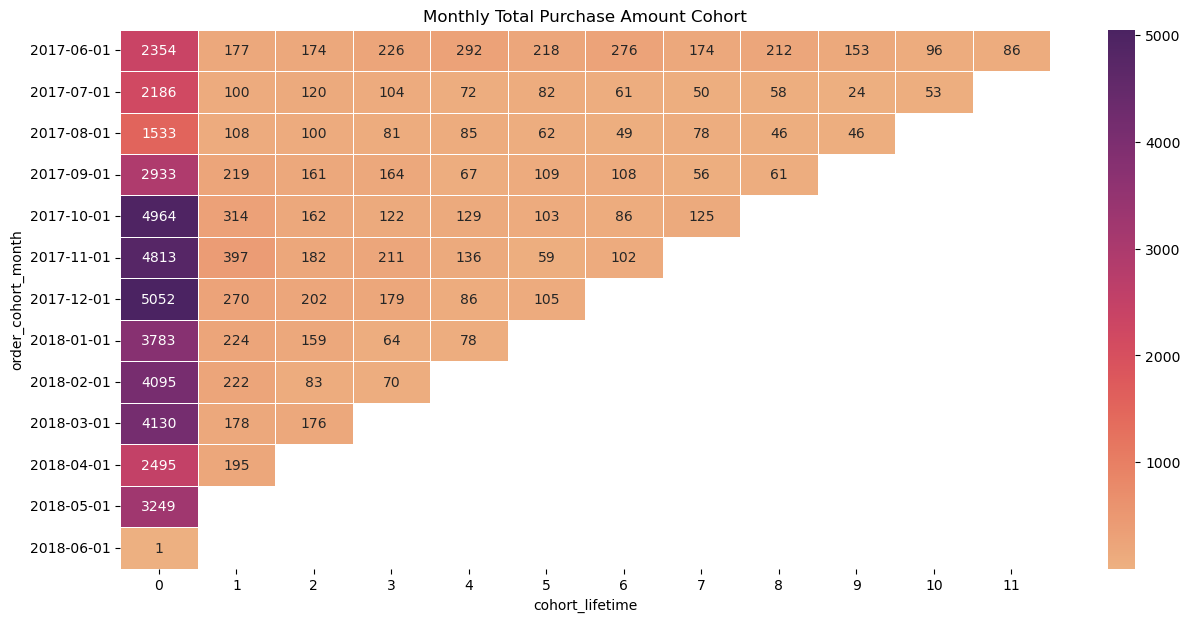

In [101]:
#plotting heatmap of number of purchases per cohort 
sales_monthly_cohort.index = sales_monthly_cohort.index.astype(str)
plt.figure(figsize=(15,7))
plt.title('Monthly Total Purchase Amount Cohort')
sns.heatmap(sales_monthly_cohort, annot=True, linewidth=.5, fmt='.4g', cmap='flare');

#### The monthly amount of purchases decrease overtime, although the first cohort has the highest number of purchases through the year. The September through November cohorts are also high. 

#### Monthly Revenue and Orders

In [102]:
#calculating number of purchases and total revenue for each week
sales_monthly2 = rev_per_sess.groupby('buy_month').agg({'revenue': ['count', 'sum']})
sales_monthly2

revenue          
             count       sum
buy_month                   
2017-06-01    2354   9557.49
2017-07-01    2363  12539.47
2017-08-01    1807   8758.78
2017-09-01    3387  18345.51
2017-10-01    5679  27987.70
2017-11-01    5659  27069.93
2017-12-01    6218  36388.60
2018-01-01    4721  19417.13
2018-02-01    5281  25560.54
2018-03-01    5326  28834.59
2018-04-01    3273  16858.06
2018-05-01    4346  20735.98
2018-06-01       1      3.42

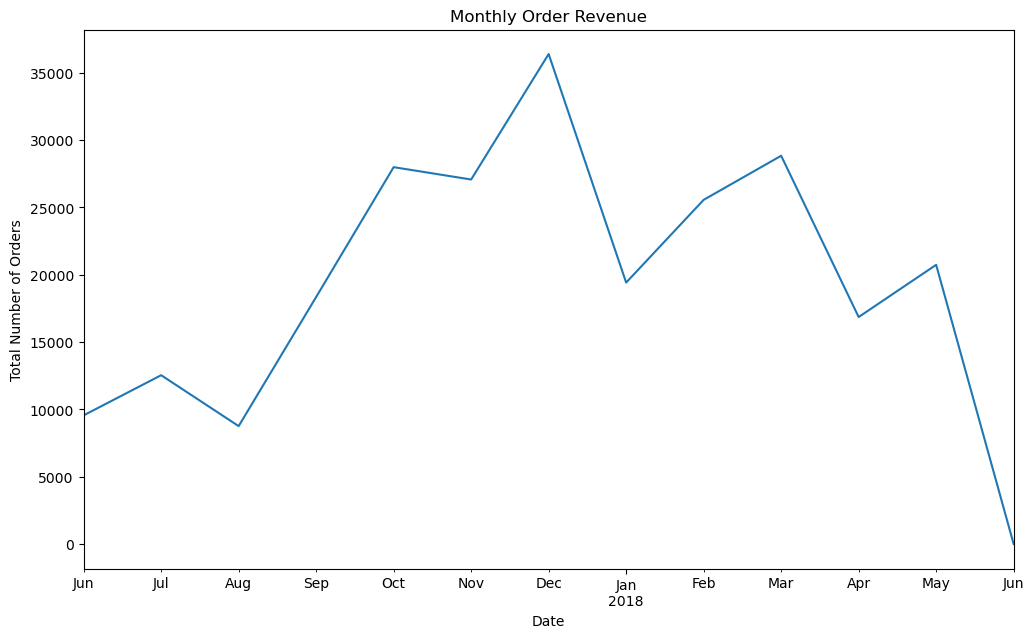

In [103]:
# Create plots for monthly revenue
sales_monthly2['revenue']['sum'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Total Number of Orders')
plt.title('Monthly Order Revenue');

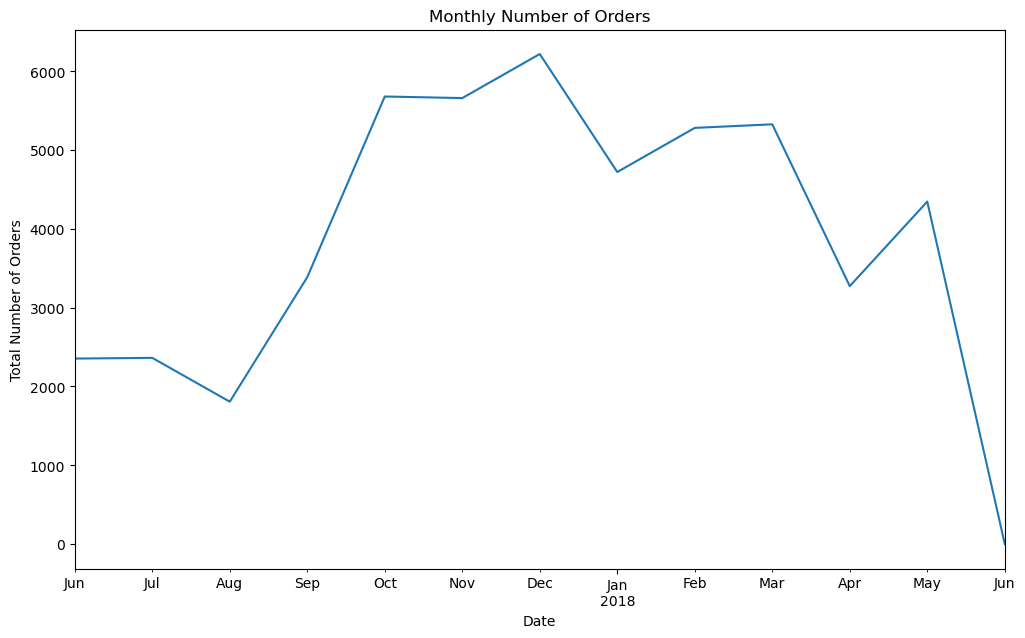

In [104]:
# Create plots for number of monthly purchases
sales_monthly2['revenue']['count'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Total Number of Orders')
plt.title('Monthly Number of Orders');

#### The number of orders and revenue increased from September to November and started decreasing in December. Orders and revenue dropped off in May which also coincides with user activity.

In [105]:
#finding average purchase size, revenue/ orders per day, week, month 
sales_daily['av_check'] = sales_daily['revenue']['sum'] / sales_daily['revenue']['count']
sales_weekly['av_check'] = sales_weekly['revenue']['sum'] / sales_weekly['revenue']['count']
sales_monthly2['av_check'] = sales_monthly2['revenue']['sum'] / sales_monthly2['revenue']['count']

In [106]:
#looking at the average purchase per day, week, and month to compare 
print('The average purchase per day is:', sales_daily['av_check'].mean())
print('The average purchase per week is:', sales_weekly['av_check'].mean()) 
print('The average purchase per month is:', sales_monthly2['av_check'].mean()) 

The average purchase per day is: 4.9361875819465615
The average purchase per week is: 4.995856180258789
The average purchase per month is: 4.838699619166363


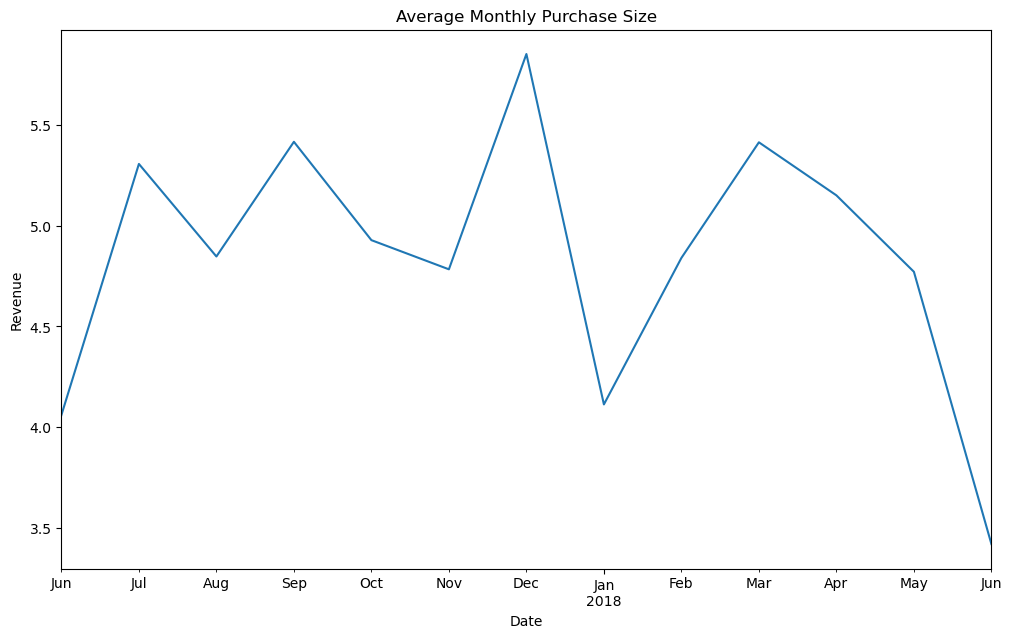

In [107]:
#looking at monthly purchase size
sales_monthly2['av_check'].plot(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Average Monthly Purchase Size');

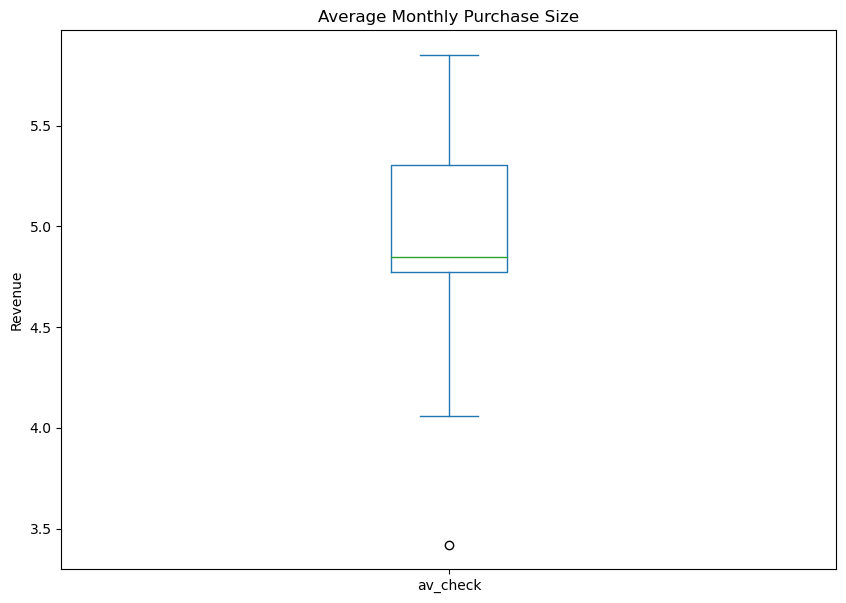

In [108]:
#looking at purchase size in boxplot 
sales_monthly2['av_check'].plot(kind='box', figsize=(10,7))
plt.ylabel('Revenue')
plt.title('Average Monthly Purchase Size');

#### The average purchase size per day, week, and month is very similar - 5. 

### Finding LTV

In [109]:
buyers.head()

uid  revenue order_month order_date first_order_date  \
0  10329302124590727494    17.00  2017-06-01 2017-06-01       2017-06-01   
1  11627257723692907447     0.55  2017-06-01 2017-06-01       2017-06-01   
2  17903680561304213844     0.37  2017-06-01 2017-06-01       2017-06-01   
3  16109239769442553005     0.55  2017-06-01 2017-06-01       2017-06-01   
4  14200605875248379450     0.37  2017-06-01 2017-06-01       2017-06-01   

  first_session_date  source_id   device  conversion order_cohort_month  \
0         2017-06-01          1  desktop           0         2017-06-01   
1         2017-06-01          2  desktop           0         2017-06-01   
2         2017-06-01          2  desktop           0         2017-06-01   
3         2017-06-01          2  desktop           0         2017-06-01   
4         2017-06-01          3  desktop           0         2017-06-01   

       first_order_ts first_order_dt first_order_month first_order_week  \
0 2017-06-01 00:10:00     2017-06-01        2017-06-01       2017-06-01   
1 2017-06-01 00:25:00     2017-06-01        2017-06-01       2017-06-01   
2 2017-06-01 00:27:00     2017-06-01        2017-06-01       2017-06-01   
3 2017-06-01 00:29:00     2017-06-01        2017-06-01       2017-06-01   
4 2017-06-01 07:58:00     2017-06-01        2017-06-01       2017-06-01   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [110]:
#make a cohort report starting from the date of the first order then calculating first number of unique users in each cohort
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
cohort_sizes

first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988
12        2018-06-01         1

In [111]:
#calculating the total revenue 
cohort_3 = buyers.groupby(['first_order_month', 'order_month'])\
                    .agg({'revenue': ['sum', 'count']}).reset_index()
cohort_3

first_order_month order_month   revenue      
                                       sum count
0         2017-06-01  2017-06-01   9557.49  2354
1         2017-06-01  2017-07-01    981.82   177
2         2017-06-01  2017-08-01    885.34   174
3         2017-06-01  2017-09-01   1931.30   226
4         2017-06-01  2017-10-01   2068.58   292
..               ...         ...       ...   ...
74        2018-03-01  2018-05-01   1114.87   176
75        2018-04-01  2018-04-01  10600.69  2495
76        2018-04-01  2018-05-01   1209.92   195
77        2018-05-01  2018-05-01  13925.76  3249
78        2018-06-01  2018-06-01      3.42     1

[79 rows x 4 columns]

In [112]:
# Calculating the age of each cohort

cohort_3['age'] = ((pd.to_datetime(cohort_3['order_month']) - pd.to_datetime(cohort_3['first_order_month'])) / np.timedelta64(1,'M')).round()
cohort_3.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age']
cohort_3

first_order_month order_month   revenue  n_orders  age
0         2017-06-01  2017-06-01   9557.49      2354  0.0
1         2017-06-01  2017-07-01    981.82       177  1.0
2         2017-06-01  2017-08-01    885.34       174  2.0
3         2017-06-01  2017-09-01   1931.30       226  3.0
4         2017-06-01  2017-10-01   2068.58       292  4.0
..               ...         ...       ...       ...  ...
74        2018-03-01  2018-05-01   1114.87       176  2.0
75        2018-04-01  2018-04-01  10600.69      2495  0.0
76        2018-04-01  2018-05-01   1209.92       195  1.0
77        2018-05-01  2018-05-01  13925.76      3249  0.0
78        2018-06-01  2018-06-01      3.42         1  0.0

[79 rows x 5 columns]

In [113]:
#merging cohort sizes with cohort_3
cohorts_report = pd.merge(cohort_sizes, cohort_3, on = 'first_order_month')
cohorts_report

first_order_month  n_buyers order_month   revenue  n_orders  age
0         2017-06-01      2023  2017-06-01   9557.49      2354  0.0
1         2017-06-01      2023  2017-07-01    981.82       177  1.0
2         2017-06-01      2023  2017-08-01    885.34       174  2.0
3         2017-06-01      2023  2017-09-01   1931.30       226  3.0
4         2017-06-01      2023  2017-10-01   2068.58       292  4.0
..               ...       ...         ...       ...       ...  ...
74        2018-03-01      3533  2018-05-01   1114.87       176  2.0
75        2018-04-01      2276  2018-04-01  10600.69      2495  0.0
76        2018-04-01      2276  2018-05-01   1209.92       195  1.0
77        2018-05-01      2988  2018-05-01  13925.76      3249  0.0
78        2018-06-01         1  2018-06-01      3.42         1  0.0

[79 rows x 6 columns]

In [114]:
# Add number of customers in each cohort to the report and calculate the revenue and the number of orders per user
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']
cohorts_report

first_order_month  n_buyers order_month   revenue  n_orders  age  \
0         2017-06-01      2023  2017-06-01   9557.49      2354  0.0   
1         2017-06-01      2023  2017-07-01    981.82       177  1.0   
2         2017-06-01      2023  2017-08-01    885.34       174  2.0   
3         2017-06-01      2023  2017-09-01   1931.30       226  3.0   
4         2017-06-01      2023  2017-10-01   2068.58       292  4.0   
..               ...       ...         ...       ...       ...  ...   
74        2018-03-01      3533  2018-05-01   1114.87       176  2.0   
75        2018-04-01      2276  2018-04-01  10600.69      2495  0.0   
76        2018-04-01      2276  2018-05-01   1209.92       195  1.0   
77        2018-05-01      2988  2018-05-01  13925.76      3249  0.0   
78        2018-06-01         1  2018-06-01      3.42         1  0.0   

    rev_per_buyer  orders_per_buyer  
0        4.724414          1.163618  
1        0.485329          0.087494  
2        0.437637          0.086011  
3        0.954671          0.111715  
4        1.022531          0.144340  
..            ...               ...  
74       0.315559          0.049816  
75       4.657597          1.096221  
76       0.531599          0.085677  
77       4.660562          1.087349  
78       3.420000          1.000000  

[79 rows x 8 columns]

In [115]:
# Create cohort age report which should demonstrate cumulative revenue per user

cohort_age = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='rev_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)


cohort_age.fillna('')

age                    0.0       1.0       2.0        3.0        4.0   \
first_order_month                                                       
2017-06-01         4.724414  5.209743   5.64738   6.602051   7.624582   
2017-07-01         6.010218  6.345429   6.96896   7.327936   7.504727   
2017-08-01         5.276518  5.748511  6.206993    6.59827   7.092321   
2017-09-01         5.644529  6.762115  7.283045  11.258838  11.659396   
2017-10-01         5.003733  5.539495  5.730889   5.888035   6.039594   
2017-11-01         5.154683  5.553916  5.753472   6.078424   6.226437   
2017-12-01         4.738191  4.998565  5.923662   6.988937   7.301866   
2018-01-01         4.135636  4.430394  4.734675   4.877453   4.940151   
2018-02-01         4.156987  4.435262  4.513777   4.587921              
2018-03-01         4.838803  5.139694  5.455253                         
2018-04-01         4.657597  5.189196                                   
2018-05-01         4.660562                                             
2018-06-01         3.420000                                             

age                     5.0        6.0       7.0        8.0        9.0   \
first_order_month                                                         
2017-06-01          8.360084   9.310524  9.892116  10.445329  11.051117   
2017-07-01          7.660775   7.780983  7.922803   8.084035    8.23118   
2017-08-01          7.375861   7.586526  7.991533   8.283745   8.471723   
2017-09-01         12.306463  13.008071  13.25122  13.435227              
2017-10-01          6.159956   6.244772  6.360242                         
2017-11-01          6.280316   6.395244                                   
2017-12-01          7.639913                                              
2018-01-01                                                                
2018-02-01                                                                
2018-03-01                                                                
2018-04-01                                                                
2018-05-01                                                                
2018-06-01                                                                

age                     10.0       11.0  
first_order_month                        
2017-06-01         11.622378  11.879234  
2017-07-01          8.386854             
2017-08-01                               
2017-09-01                               
2017-10-01                               
2017-11-01                               
2017-12-01                               
2018-01-01                               
2018-02-01                               
2018-03-01                               
2018-04-01                               
2018-05-01                               
2018-06-01

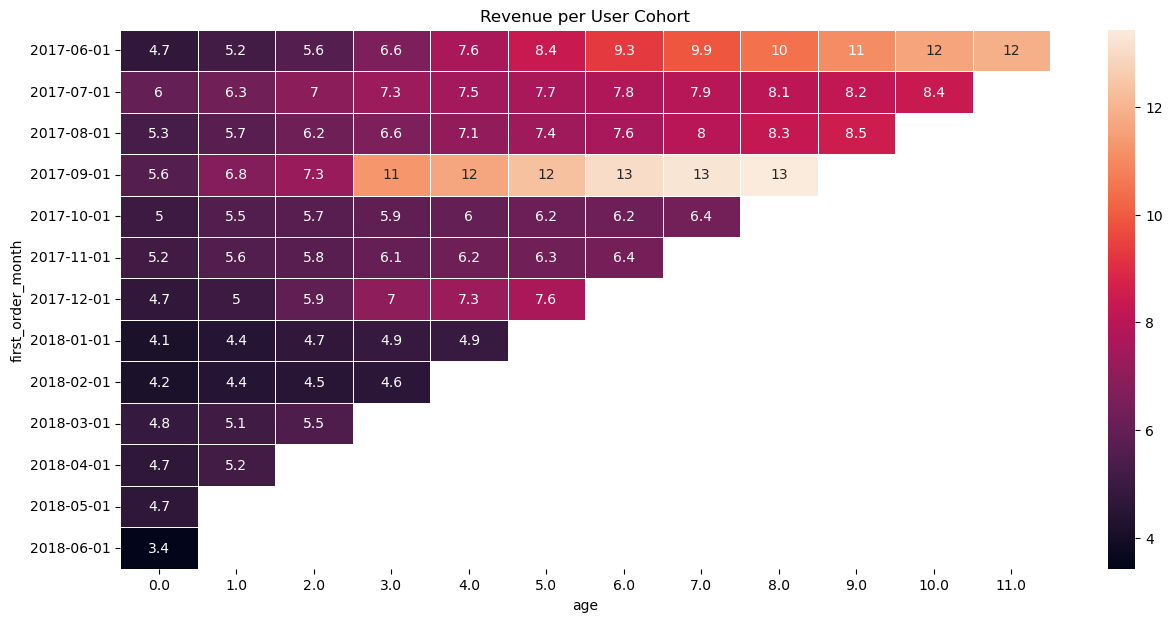

In [116]:
#plotting heatmap of cumulative revenue per user 
cohort_age.index = cohort_age.index.astype(str)
plt.figure(figsize=(15,7))
plt.title('Revenue per User Cohort')
sns.heatmap(cohort_age, annot=True, linewidth=.5, fmt='.2g');

In [117]:
#calculating the cumlative sum of ltv 
cohort_age.cumsum(axis=1).mean(axis=0)[6] 

48.8223716175029

#### The revenue per user cohort for June and September both increase towards the end of the year with September doing really well at the 4th  month. The average LTV for 6 months from the first order is \\$48.82. For marketing investments to pay off, one customer acquisition cannot cost more than this. 

In [118]:
# Create cohort age report which should demonstrate cumulative revenue and amount of orders per user

cohorts_age = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values=['rev_per_buyer', 'orders_per_buyer'], 
    aggfunc='sum'
).cumsum(axis=1)

cohorts_age.fillna('')

orders_per_buyer                                          \
age                           0.0       1.0       2.0       3.0       4.0    
first_order_month                                                            
2017-06-01                1.163618  1.251112  1.337123  1.448838  1.593178   
2017-07-01                1.136765  1.188768   1.25117  1.305252  1.342694   
2017-08-01                1.118978   1.19781  1.270803  1.329927  1.391971   
2017-09-01                1.136381  1.221232  1.283611  1.347152  1.373111   
2017-10-01                1.143779  1.216129  1.253456  1.281567   1.31129   
2017-11-01                1.179368  1.276648  1.321245  1.372948  1.406273   
2017-12-01                1.152635  1.214237  1.260324  1.301164  1.320785   
2018-01-01                1.121554  1.187963  1.235102  1.254076  1.277201   
2018-02-01                1.121611  1.182416  1.205149  1.224322             
2018-03-01                1.168978   1.21936  1.269176                       
2018-04-01                1.096221  1.181898                                 
2018-05-01                1.087349                                           
2018-06-01                1.000000                                           

                                                                     ...  \
age                    5.0       6.0       7.0       8.0       9.0   ...   
first_order_month                                                    ...   
2017-06-01         1.700939   1.83737  1.923381  2.028176  2.103806  ...   
2017-07-01         1.385335  1.417057  1.443058  1.473219  1.485699  ...   
2017-08-01         1.437226  1.472993  1.529927  1.563504   1.59708  ...   
2017-09-01         1.415343  1.457187  1.478884  1.502518            ...   
2017-10-01         1.335023  1.354839  1.383641                      ...   
2017-11-01          1.42073  1.445724                                ...   
2017-12-01         1.344741                                          ...   
2018-01-01                                                           ...   
2018-02-01                                                           ...   
2018-03-01                                                           ...   
2018-04-01                                                           ...   
2018-05-01                                                           ...   
2018-06-01                                                           ...   

                  rev_per_buyer                                              \
age                        2.0        3.0        4.0        5.0        6.0    
first_order_month                                                             
2017-06-01             7.841152   8.795823   9.818354  10.553856  11.504296   
2017-07-01              8.48222   8.841196   9.017988   9.174035   9.294243   
2017-08-01             7.804073    8.19535   8.689401   8.972942   9.183606   
2017-09-01             8.785564  12.761356  13.161914  13.808981  14.510589   
2017-10-01              7.11453   7.271675   7.423235   7.543597   7.628412   
2017-11-01             7.199196   7.524148   7.672161    7.72604   7.840968   
2017-12-01             7.268403   8.333678   8.646607   8.984654              
2018-01-01             6.011877   6.154655   6.217353                         
2018-02-01             5.738099   5.812243                                    
2018-03-01              6.72443                                               
2018-04-01                                                                    
2018-05-01                                                                    
2018-06-01                                                                    

                                                                          
age                     7.0        8.0        9.0        10.0       11.0  
first_order_month                                                         
2017-06-01         12.085887    12.6391  13.244889  13.816149 

In [119]:
print('On average, each user makes {:.2f} orders and brings ${:.2f} one week after the first order'\
      .format(cohorts_age['orders_per_buyer'][1].mean(), cohorts_age['rev_per_buyer'][1].mean()))

On average, each user makes 1.21 orders and brings $6.84 one week after the first order


### Expenses Report

In [120]:
costs.head()

source_id         dt  costs cost_month
0          1 2017-06-01  75.20 2017-06-01
1          1 2017-06-02  62.25 2017-06-01
2          1 2017-06-03  36.53 2017-06-01
3          1 2017-06-04  55.00 2017-06-01
4          1 2017-06-05  57.08 2017-06-01

In [121]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs

source_id         dt  costs cost_month
0             1 2017-06-01  75.20 2017-06-01
1             1 2017-06-02  62.25 2017-06-01
2             1 2017-06-03  36.53 2017-06-01
3             1 2017-06-04  55.00 2017-06-01
4             1 2017-06-05  57.08 2017-06-01
...         ...        ...    ...        ...
2537         10 2018-05-27   9.92 2018-05-01
2538         10 2018-05-28  21.26 2018-05-01
2539         10 2018-05-29  11.32 2018-05-01
2540         10 2018-05-30  33.15 2018-05-01
2541         10 2018-05-31  17.60 2018-05-01

[2542 rows x 4 columns]

In [122]:
#How much money was spent? Overall, per source and over time.
expenses = costs.groupby(['source_id', 'cost_month']).agg({'costs': 'sum'}).reset_index()
expenses['cost_month'] = expenses['cost_month'].astype(str)
expenses

source_id  cost_month    costs
0           1  2017-06-01  1125.61
1           1  2017-07-01  1072.88
2           1  2017-08-01   951.81
3           1  2017-09-01  1502.01
4           1  2017-10-01  2315.75
..        ...         ...      ...
79         10  2018-01-01   614.35
80         10  2018-02-01   480.88
81         10  2018-03-01   526.41
82         10  2018-04-01   388.25
83         10  2018-05-01   409.86

[84 rows x 3 columns]

In [123]:
expenses['costs'].sum()

329131.62

#### The total expense for advertising for the year is $329,131.62.

<Figure size 1500x700 with 0 Axes>

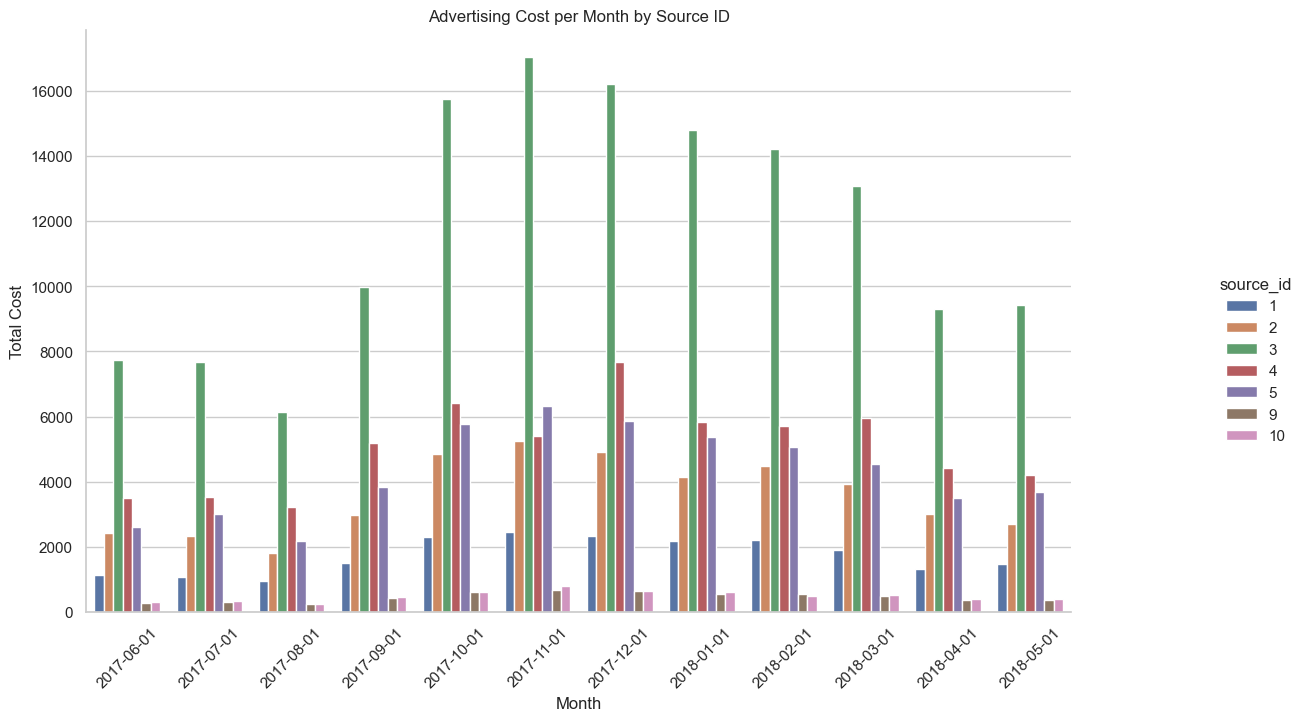

In [124]:
#plotting expenses per month 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7))
g = sns.catplot(data=expenses, 
                kind='bar',
               x='cost_month',
               y='costs',
               hue='source_id')
g.set_axis_labels("Month", "Total Cost")
plt.title('Advertising Cost per Month by Source ID')
g.fig.set_size_inches(15,7)
plt.xticks(rotation=45);

In [125]:
expenses.groupby('source_id')['costs'].mean()

source_id
1      1736.105833
2      3567.170000
3     11776.802500
4      5089.466667
5      4313.091667
9       459.790833
10      485.207500
Name: costs, dtype: float64

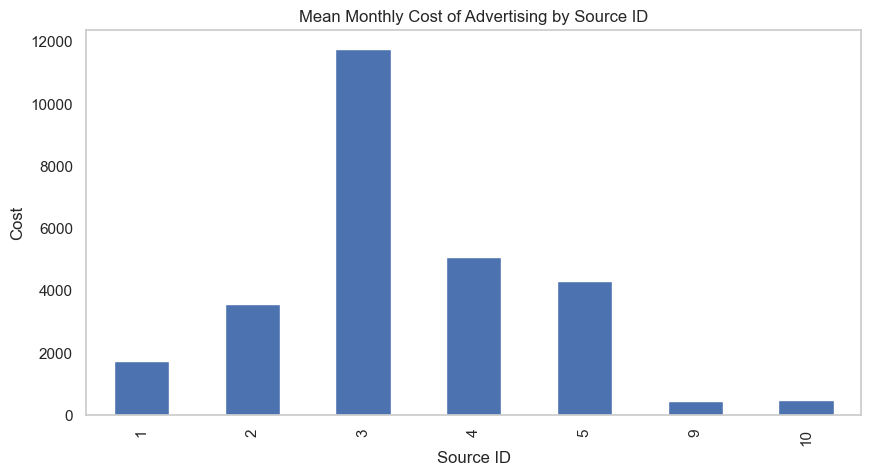

In [126]:
plt.figure(figsize=(10,5))
expenses.groupby('source_id')['costs'].mean().plot(kind='bar', grid=False)
plt.title('Mean Monthly Cost of Advertising by Source ID')
plt.xlabel('Source ID')
plt.ylabel('Cost');

#### November seems to be the month where advertising costs are the highest. Ad source ID 3 costs the most and even doubles source ID 4. 

### Calculating Total CAC per Month

In [127]:
# group costs by month and sum costs 
cac_source = costs.groupby('cost_month').agg({'costs':'sum'})
cac_source

costs
cost_month          
2017-06-01  18015.00
2017-07-01  18240.59
2017-08-01  14790.54
2017-09-01  24368.91
2017-10-01  36322.88
2017-11-01  37907.88
2017-12-01  38315.35
2018-01-01  33518.52
2018-02-01  32723.03
2018-03-01  30415.27
2018-04-01  22289.38
2018-05-01  22224.27

In [128]:
# group orders by first order month using nunique uid
orders_cac = orders.groupby('order_month').agg({'uid':'nunique'})
orders_cac

uid
order_month      
2017-06-01   2023
2017-07-01   1984
2017-08-01   1472
2017-09-01   2750
2017-10-01   4675
2017-11-01   4547
2017-12-01   4942
2018-01-01   3898
2018-02-01   4258
2018-03-01   4181
2018-04-01   2744
2018-05-01   3544
2018-06-01      1

In [129]:
#merging the two previous df
cac_per_month = pd.merge(cac_source, orders_cac, left_index=True, right_index=True)
cac_per_month

costs   uid
2017-06-01  18015.00  2023
2017-07-01  18240.59  1984
2017-08-01  14790.54  1472
2017-09-01  24368.91  2750
2017-10-01  36322.88  4675
2017-11-01  37907.88  4547
2017-12-01  38315.35  4942
2018-01-01  33518.52  3898
2018-02-01  32723.03  4258
2018-03-01  30415.27  4181
2018-04-01  22289.38  2744
2018-05-01  22224.27  3544

In [130]:
#calculating cac per month 
cac_per_month['cac_per_month'] = cac_per_month['costs']/cac_per_month['uid']

cac_per_month

costs   uid  cac_per_month
2017-06-01  18015.00  2023       8.905091
2017-07-01  18240.59  1984       9.193846
2017-08-01  14790.54  1472      10.047921
2017-09-01  24368.91  2750       8.861422
2017-10-01  36322.88  4675       7.769600
2017-11-01  37907.88  4547       8.336899
2017-12-01  38315.35  4942       7.753005
2018-01-01  33518.52  3898       8.598902
2018-02-01  32723.03  4258       7.685070
2018-03-01  30415.27  4181       7.274640
2018-04-01  22289.38  2744       8.122952
2018-05-01  22224.27  3544       6.270957

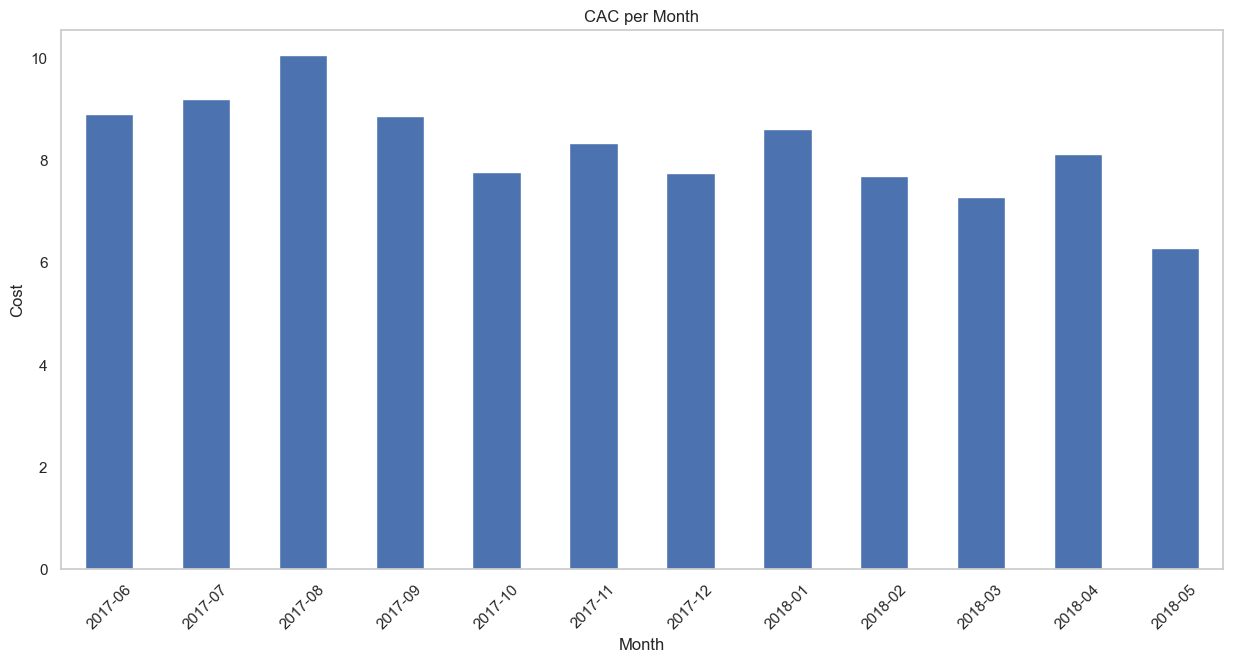

In [131]:
# Plotting CAC per month
axes = cac_per_month['cac_per_month'].plot.bar(figsize=(15, 7))

# Format the x-axis labels to show only the month
axes.set_xticklabels([date.strftime('%Y-%m') for date in cac_per_month.index], rotation=45)

plt.title('CAC per Month')
plt.xlabel('Month')
plt.ylabel('Cost')
axes.grid(False)
plt.show()

#### CAC costs in August is the highest, and the lowest in May. 

### CAC per Month per Source ID

In [132]:
#adding first_order_day to df 

first_orders['first_order_day'] = first_orders['first_order_ts'].astype('datetime64[D]')
first_orders.head()


uid      first_order_ts first_order_dt first_order_month  \
0   313578113262317 2018-01-03 21:51:00     2018-01-03        2018-01-01   
1  1575281904278712 2017-06-03 10:13:00     2017-06-03        2017-06-01   
2  2429014661409475 2017-10-11 18:33:00     2017-10-11        2017-10-01   
3  2464366381792757 2018-01-28 15:54:00     2018-01-28        2018-01-01   
4  2551852515556206 2017-11-24 10:14:00     2017-11-24        2017-11-01   

  first_order_week first_order_day  
0       2017-12-28      2018-01-03  
1       2017-06-01      2017-06-03  
2       2017-10-05      2017-10-11  
3       2018-01-25      2018-01-28  
4       2017-11-23      2017-11-24

In [133]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   

                    uid session_year session_month session_week session_date  \
0  16879256277535980062   2017-01-01    2017-12-01   2017-12-14   2017-12-20   
1    104060357244891740   2018-01-01    2018-02-01   2018-02-15   2018-02-19   
2   7459035603376831527   2017-01-01    2017-07-01   2017-06-29   2017-07-01   
3  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
4  16174680259334210214   2018-01-01    2018-03-01   2018-03-08   2018-03-09   

   session_duration_min first_session_date cohort_month  cohort_lifetime  
0                  18.0         2017-12-20   2017-12-01                0  
1                  28.0         2018-02-19   2018-02-01                0  
2                   0.0         2017-07-01   2017-07-01                0  
3                  24.0         2018-03-09   2018-03-01                2  
4                  28.0         2018-03-09   2018-03-01                0

In [134]:
#finding the first source through which the user visited 
first_source =visits.sort_values(by='start_ts').groupby('uid').first('source_id')
first_source

source_id  session_duration_min  cohort_lifetime
uid                                                                   
11863502262781                3                   6.0                0
49537067089222                2                   2.0                0
297729379853735               3                   1.0                0
313578113262317               2                  18.0                0
325320750514679               5                   9.0                0
...                         ...                   ...              ...
18446403737806311543          5                   3.0                0
18446424184725333426          4                   0.0                0
18446556406699109058          3                   2.0                0
18446621818809592527          4                  41.0                0
18446676030785672386          3                  26.0                0

[228169 rows x 3 columns]

In [135]:
#merging first orders and first_source
df = pd.merge(first_orders, first_source, on='uid')
df.head()

uid      first_order_ts first_order_dt first_order_month  \
0   313578113262317 2018-01-03 21:51:00     2018-01-03        2018-01-01   
1  1575281904278712 2017-06-03 10:13:00     2017-06-03        2017-06-01   
2  2429014661409475 2017-10-11 18:33:00     2017-10-11        2017-10-01   
3  2464366381792757 2018-01-28 15:54:00     2018-01-28        2018-01-01   
4  2551852515556206 2017-11-24 10:14:00     2017-11-24        2017-11-01   

  first_order_week first_order_day  source_id  session_duration_min  \
0       2017-12-28      2018-01-03          2             18.000000   
1       2017-06-01      2017-06-03         10              4.000000   
2       2017-10-05      2017-10-11          3             13.000000   
3       2018-01-25      2018-01-28          5              3.000000   
4       2017-11-23      2017-11-24          5              0.316667   

   cohort_lifetime  
0                0  
1                0  
2                0  
3                0  
4                0

In [136]:
#grouping by the source_id and first order day, counting the uid 
df2 = df.groupby(['source_id','first_order_day']).agg({'uid':'count'})
df2

uid
source_id first_order_day     
1         2017-06-01        14
          2017-06-02         7
          2017-06-03         7
          2017-06-04         3
          2017-06-05        18
...                        ...
10        2018-05-27         2
          2018-05-28        10
          2018-05-29         7
          2018-05-30         5
          2018-05-31        35

[2435 rows x 1 columns]

In [137]:
#adding costs_day to costs df 
costs['costs_day'] = costs['dt'].astype('datetime64[D]')
costs

source_id         dt  costs cost_month  costs_day
0             1 2017-06-01  75.20 2017-06-01 2017-06-01
1             1 2017-06-02  62.25 2017-06-01 2017-06-02
2             1 2017-06-03  36.53 2017-06-01 2017-06-03
3             1 2017-06-04  55.00 2017-06-01 2017-06-04
4             1 2017-06-05  57.08 2017-06-01 2017-06-05
...         ...        ...    ...        ...        ...
2537         10 2018-05-27   9.92 2018-05-01 2018-05-27
2538         10 2018-05-28  21.26 2018-05-01 2018-05-28
2539         10 2018-05-29  11.32 2018-05-01 2018-05-29
2540         10 2018-05-30  33.15 2018-05-01 2018-05-30
2541         10 2018-05-31  17.60 2018-05-01 2018-05-31

[2542 rows x 5 columns]

In [138]:
#merge with costs 
df3 = pd.merge(costs, df2, left_on=['source_id', 'costs_day'], right_on=['source_id', 'first_order_day'])
df3

source_id         dt  costs cost_month  costs_day  uid
0             1 2017-06-01  75.20 2017-06-01 2017-06-01   14
1             1 2017-06-02  62.25 2017-06-01 2017-06-02    7
2             1 2017-06-03  36.53 2017-06-01 2017-06-03    7
3             1 2017-06-04  55.00 2017-06-01 2017-06-04    3
4             1 2017-06-05  57.08 2017-06-01 2017-06-05   18
...         ...        ...    ...        ...        ...  ...
2428         10 2018-05-27   9.92 2018-05-01 2018-05-27    2
2429         10 2018-05-28  21.26 2018-05-01 2018-05-28   10
2430         10 2018-05-29  11.32 2018-05-01 2018-05-29    7
2431         10 2018-05-30  33.15 2018-05-01 2018-05-30    5
2432         10 2018-05-31  17.60 2018-05-01 2018-05-31   35

[2433 rows x 6 columns]

In [139]:
#calculating the cac per source 
df3['cac_per_source'] = df3['costs']/df3['uid']
df3

source_id         dt  costs cost_month  costs_day  uid  cac_per_source
0             1 2017-06-01  75.20 2017-06-01 2017-06-01   14        5.371429
1             1 2017-06-02  62.25 2017-06-01 2017-06-02    7        8.892857
2             1 2017-06-03  36.53 2017-06-01 2017-06-03    7        5.218571
3             1 2017-06-04  55.00 2017-06-01 2017-06-04    3       18.333333
4             1 2017-06-05  57.08 2017-06-01 2017-06-05   18        3.171111
...         ...        ...    ...        ...        ...  ...             ...
2428         10 2018-05-27   9.92 2018-05-01 2018-05-27    2        4.960000
2429         10 2018-05-28  21.26 2018-05-01 2018-05-28   10        2.126000
2430         10 2018-05-29  11.32 2018-05-01 2018-05-29    7        1.617143
2431         10 2018-05-30  33.15 2018-05-01 2018-05-30    5        6.630000
2432         10 2018-05-31  17.60 2018-05-01 2018-05-31   35        0.502857

[2433 rows x 7 columns]

In [140]:
#grouping into pivot table to look at cac per month 
cac_month_pivot = df3.pivot_table(index='cost_month', columns='source_id', values='cac_per_source', aggfunc='sum')
cac_month_pivot

source_id           1           2           3           4           5   \
cost_month                                                               
2017-06-01  338.757214  386.507044  501.507555  323.762816  276.290274   
2017-07-01  294.236030  558.007856  576.412504  249.688956  246.082863   
2017-08-01  363.566944  566.593464  613.647109  358.202715  213.268219   
2017-09-01  244.671942  530.167468  392.521296  286.013990  205.945329   
2017-10-01  254.264563  439.983099  453.005743  193.240429  195.485051   
2017-11-01  267.255096  523.130688  482.743338  150.393952  281.040563   
2017-12-01  265.683623  430.003653  401.397948  175.351716  260.374396   
2018-01-01  363.294599  491.354672  469.184648  182.933862  290.524396   
2018-02-01  301.062045  509.861093  389.049140  151.985911  216.310341   
2018-03-01  240.659216  483.665414  466.915231  195.855105  309.276652   
2018-04-01  248.939295  511.807611  462.888064  190.445485  279.300983   
2018-05-01  243.402504  464.820459  446.439633  174.495944  252.334179   

source_id           9           10  
cost_month                          
2017-06-01  131.341357  119.344095  
2017-07-01  106.066222  141.493238  
2017-08-01  132.306857  110.454571  
2017-09-01  157.277273  232.584274  
2017-10-01  171.773817  184.524722  
2017-11-01  263.214092  313.238778  
2017-12-01  221.183772  202.883119  
2018-01-01  283.988667  285.695143  
2018-02-01  188.171776  125.709460  
2018-03-01  138.134792  127.008146  
2018-04-01  116.840833  109.860381  
2018-05-01  156.145167  144.936866

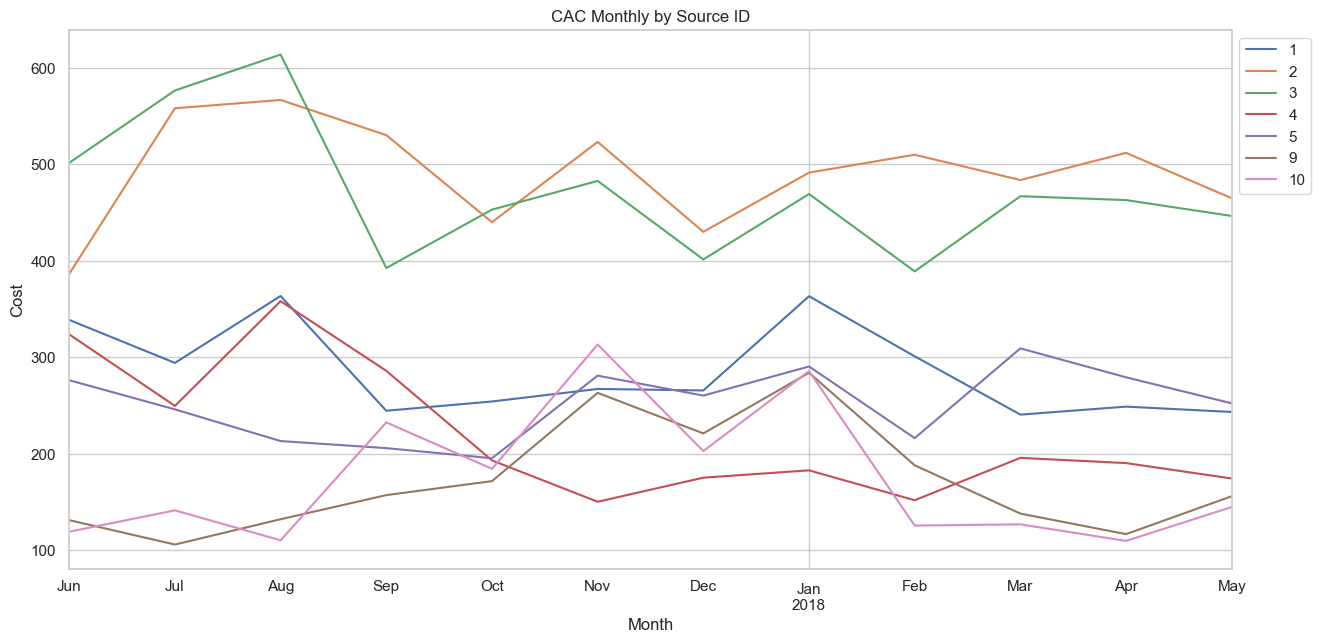

In [141]:
#plotting the monthly CAC per month by source ID
ax = cac_month_pivot.plot(figsize=(15,7))
plt.title('CAC Monthly by Source ID')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.legend(bbox_to_anchor=(1,1));

#### The CAC per month by source ID is highest in August which coincides with the monthly expenses. Source ID 3 is also identified as the being the highest for CAC in August and source ID 2 is highest for the rest of the year. CAC per month per month is costly for these two sources. 

#### Return on Investment (ROI)

In [142]:
#cohort of revenue per buyer monthly 
cohort_rev_per_buyer = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='rev_per_buyer', 
    aggfunc='sum')
cohort_rev_per_buyer 

age                    0.0       1.0       2.0       3.0       4.0       5.0   \
first_order_month                                                               
2017-06-01         4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07-01         6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08-01         5.276518  0.471993  0.458482  0.391277  0.494051  0.283540   
2017-09-01         5.644529  1.117586  0.520930  3.975792  0.400558  0.647067   
2017-10-01         5.003733  0.535763  0.191394  0.157145  0.151560  0.120362   
2017-11-01         5.154683  0.399233  0.199556  0.324952  0.148013  0.053879   
2017-12-01         4.738191  0.260374  0.925097  1.065275  0.312930  0.338047   
2018-01-01         4.135636  0.294758  0.304281  0.142778  0.062698       NaN   
2018-02-01         4.156987  0.278274  0.078515  0.074144       NaN       NaN   
2018-03-01         4.838803  0.300892  0.315559       NaN       NaN       NaN   
2018-04-01         4.657597  0.531599       NaN       NaN       NaN       NaN   
2018-05-01         4.660562       NaN       NaN       NaN       NaN       NaN   
2018-06-01         3.420000       NaN       NaN       NaN       NaN       NaN   

age                    6.0       7.0       8.0       9.0       10.0      11.0  
first_order_month                                                              
2017-06-01         0.950440  0.581592  0.553213  0.605788  0.571261  0.256856  
2017-07-01         0.120208  0.141820  0.161232  0.147145  0.155673       NaN  
2017-08-01         0.210664  0.405007  0.292212  0.187978       NaN       NaN  
2017-09-01         0.701608  0.243150  0.184006       NaN       NaN       NaN  
2017-10-01         0.084816  0.115470       NaN       NaN       NaN       NaN  
2017-11-01         0.114928       NaN       NaN       NaN       NaN       NaN  
2017-12-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01              NaN       NaN       NaN       NaN       NaN       NaN  
2018-06-01              NaN       NaN       NaN       NaN       NaN       NaN

In [143]:
#merging the cac per month with revenue per buyer cohort 
roi = cohort_rev_per_buyer.merge(cac_per_month, left_index=True, right_index=True)
roi = roi.drop(columns=['uid','costs'])
roi

0.0       1.0       2.0       3.0       4.0       5.0  \
2017-06-01  4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07-01  6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08-01  5.276518  0.471993  0.458482  0.391277  0.494051  0.283540   
2017-09-01  5.644529  1.117586  0.520930  3.975792  0.400558  0.647067   
2017-10-01  5.003733  0.535763  0.191394  0.157145  0.151560  0.120362   
2017-11-01  5.154683  0.399233  0.199556  0.324952  0.148013  0.053879   
2017-12-01  4.738191  0.260374  0.925097  1.065275  0.312930  0.338047   
2018-01-01  4.135636  0.294758  0.304281  0.142778  0.062698       NaN   
2018-02-01  4.156987  0.278274  0.078515  0.074144       NaN       NaN   
2018-03-01  4.838803  0.300892  0.315559       NaN       NaN       NaN   
2018-04-01  4.657597  0.531599       NaN       NaN       NaN       NaN   
2018-05-01  4.660562       NaN       NaN       NaN       NaN       NaN   

                 6.0       7.0       8.0       9.0      10.0      11.0  \
2017-06-01  0.950440  0.581592  0.553213  0.605788  0.571261  0.256856   
2017-07-01  0.120208  0.141820  0.161232  0.147145  0.155673       NaN   
2017-08-01  0.210664  0.405007  0.292212  0.187978       NaN       NaN   
2017-09-01  0.701608  0.243150  0.184006       NaN       NaN       NaN   
2017-10-01  0.084816  0.115470       NaN       NaN       NaN       NaN   
2017-11-01  0.114928       NaN       NaN       NaN       NaN       NaN   
2017-12-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-05-01       NaN       NaN       NaN       NaN       NaN       NaN   

            cac_per_month  
2017-06-01       8.905091  
2017-07-01       9.193846  
2017-08-01      10.047921  
2017-09-01       8.861422  
2017-10-01       7.769600  
2017-11-01       8.336899  
2017-12-01       7.753005  
2018-01-01       8.598902  
2018-02-01       7.685070  
2018-03-01       7.274640  
2018-04-01       8.122952  
2018-05-01       6.270957

In [144]:
#dividing each column by cac per month and dropping column 
for column in roi.columns[:-1]:
    roi[column] = roi[column]/roi['cac_per_month']
roi = roi.drop('cac_per_month', axis=1)
roi

0.0       1.0       2.0       3.0       4.0       5.0  \
2017-06-01  0.530530  0.054500  0.049145  0.107205  0.114825  0.082593   
2017-07-01  0.653722  0.036460  0.067820  0.039045  0.019229  0.016973   
2017-08-01  0.525135  0.046974  0.045630  0.038941  0.049169  0.028219   
2017-09-01  0.636978  0.126118  0.058786  0.448663  0.045202  0.073021   
2017-10-01  0.644014  0.068956  0.024634  0.020226  0.019507  0.015491   
2017-11-01  0.618297  0.047887  0.023937  0.038978  0.017754  0.006463   
2017-12-01  0.611142  0.033584  0.119321  0.137402  0.040362  0.043602   
2018-01-01  0.480949  0.034279  0.035386  0.016604  0.007291       NaN   
2018-02-01  0.540917  0.036210  0.010217  0.009648       NaN       NaN   
2018-03-01  0.665160  0.041362  0.043378       NaN       NaN       NaN   
2018-04-01  0.573387  0.065444       NaN       NaN       NaN       NaN   
2018-05-01  0.743198       NaN       NaN       NaN       NaN       NaN   

                 6.0       7.0       8.0       9.0      10.0      11.0  
2017-06-01  0.106730  0.065310  0.062123  0.068027  0.064150  0.028844  
2017-07-01  0.013075  0.015426  0.017537  0.016005  0.016932       NaN  
2017-08-01  0.020966  0.040308  0.029082  0.018708       NaN       NaN  
2017-09-01  0.079176  0.027439  0.020765       NaN       NaN       NaN  
2017-10-01  0.010916  0.014862       NaN       NaN       NaN       NaN  
2017-11-01  0.013785       NaN       NaN       NaN       NaN       NaN  
2017-12-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-02-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-03-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-04-01       NaN       NaN       NaN       NaN       NaN       NaN  
2018-05-01       NaN       NaN       NaN       NaN       NaN       NaN

In [145]:
#taking the cumulative sum of df above to look at return on investment 
roi_cum_sum = roi.cumsum(axis=1).round(2) 
roi_cum_sum 

0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  \
2017-06-01  0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17  1.24  1.31   
2017-07-01  0.65  0.69  0.76  0.80  0.82  0.83  0.85  0.86  0.88  0.90  0.91   
2017-08-01  0.53  0.57  0.62  0.66  0.71  0.73  0.76  0.80  0.82  0.84   NaN   
2017-09-01  0.64  0.76  0.82  1.27  1.32  1.39  1.47  1.50  1.52   NaN   NaN   
2017-10-01  0.64  0.71  0.74  0.76  0.78  0.79  0.80  0.82   NaN   NaN   NaN   
2017-11-01  0.62  0.67  0.69  0.73  0.75  0.75  0.77   NaN   NaN   NaN   NaN   
2017-12-01  0.61  0.64  0.76  0.90  0.94  0.99   NaN   NaN   NaN   NaN   NaN   
2018-01-01  0.48  0.52  0.55  0.57  0.57   NaN   NaN   NaN   NaN   NaN   NaN   
2018-02-01  0.54  0.58  0.59  0.60   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01  0.67  0.71  0.75   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01  0.57  0.64   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05-01  0.74   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            11.0  
2017-06-01  1.33  
2017-07-01   NaN  
2017-08-01   NaN  
2017-09-01   NaN  
2017-10-01   NaN  
2017-11-01   NaN  
2017-12-01   NaN  
2018-01-01   NaN  
2018-02-01   NaN  
2018-03-01   NaN  
2018-04-01   NaN  
2018-05-01   NaN

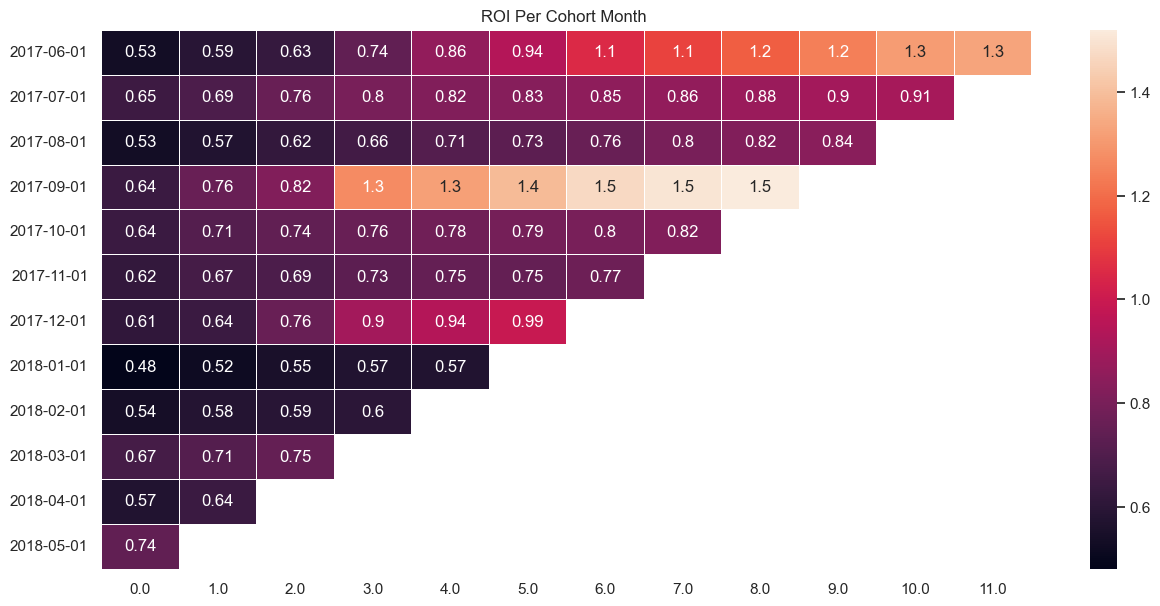

In [146]:
#plotting roi in heatmap 
roi_cum_sum.index = roi_cum_sum.index.astype(str)
plt.figure(figsize=(15,7))
plt.title('ROI Per Cohort Month ')
sns.heatmap(roi_cum_sum, annot=True, linewidth=.5);

#### The roi for the first cohort of June pays finally pays off in the 7th month. The cohort for the month of September does well and pays off earlier in the 4th month. The cohorts after do not reach an ROI until cohort month of December. We may want to replicate/ analyze what we did for the cohort month of September to reach the same ROI. 

In [147]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'session_year',
       'session_month', 'session_week', 'session_date', 'session_duration_min',
       'first_session_date', 'cohort_month', 'cohort_lifetime'],
      dtype='object')

In [148]:
buyers.columns

Index(['uid', 'revenue', 'order_month', 'order_date', 'first_order_date',
       'first_session_date', 'source_id', 'device', 'conversion',
       'order_cohort_month', 'first_order_ts', 'first_order_dt',
       'first_order_month', 'first_order_week', 'cohort_lifetime'],
      dtype='object')

In [149]:
_merge = visits.merge(buyers, on='uid', suffixes=('_visits', '_buyers'))
_merge.head()

device_visits              end_ts  source_id_visits            start_ts  \
0       desktop 2018-05-20 11:23:00                 9 2018-05-20 10:59:00   
1       desktop 2018-03-09 20:33:00                 4 2018-03-09 20:05:00   
2       desktop 2017-09-03 21:36:00                 5 2017-09-03 21:35:00   
3       desktop 2017-09-03 21:36:00                 5 2017-09-03 21:35:00   
4       desktop 2017-09-03 21:36:00                 5 2017-09-03 21:35:00   

                    uid session_year session_month session_week session_date  \
0  16174680259334210214   2018-01-01    2018-05-01   2018-05-17   2018-05-20   
1  16174680259334210214   2018-01-01    2018-03-01   2018-03-08   2018-03-09   
2  16007536194108375387   2017-01-01    2017-09-01   2017-08-31   2017-09-03   
3  16007536194108375387   2017-01-01    2017-09-01   2017-08-31   2017-09-03   
4  16007536194108375387   2017-01-01    2017-09-01   2017-08-31   2017-09-03   

   session_duration_min  ... first_session_date_buyers source_id_buyers  \
0                  24.0  ...                2018-03-09                9   
1                  28.0  ...                2018-03-09                9   
2                   1.0  ...                2017-09-03                5   
3                   1.0  ...                2017-09-03                5   
4                   1.0  ...                2017-09-03                5   

   device_buyers  conversion order_cohort_month      first_order_ts  \
0        desktop           0         2018-03-01 2018-03-09 20:25:00   
1        desktop           0         2018-03-01 2018-03-09 20:25:00   
2        desktop           1         2017-09-01 2017-09-04 12:46:00   
3        desktop           1         2017-09-01 2017-09-04 12:46:00   
4        desktop           1         2017-09-01 2017-09-04 12:46:00   

  first_order_dt first_order_month  first_order_week cohort_lifetime_buyers  
0     2018-03-09        2018-03-01        2018-03-08                      0  
1     2018-03-09        2018-03-01        2018-03-08                      0  
2     2017-09-04        2017-09-01        2017-08-31                      0  
3     2017-09-04        2017-09-01        2017-08-31                      1  
4     2017-09-04        2017-09-01        2017-08-31                      1  

[5 rows x 27 columns]

In [150]:
_merge.columns

Index(['device_visits', 'end_ts', 'source_id_visits', 'start_ts', 'uid',
       'session_year', 'session_month', 'session_week', 'session_date',
       'session_duration_min', 'first_session_date_visits', 'cohort_month',
       'cohort_lifetime_visits', 'revenue', 'order_month', 'order_date',
       'first_order_date', 'first_session_date_buyers', 'source_id_buyers',
       'device_buyers', 'conversion', 'order_cohort_month', 'first_order_ts',
       'first_order_dt', 'first_order_month', 'first_order_week',
       'cohort_lifetime_buyers'],
      dtype='object')

In [151]:
sources = _merge.sort_values(by='start_ts').groupby('uid').first('source_id').reset_index()
sources

uid  source_id_visits  session_duration_min  \
0           313578113262317                 2             18.000000   
1          1575281904278712                10              4.000000   
2          2429014661409475                 3             13.000000   
3          2464366381792757                 5              3.000000   
4          2551852515556206                 5              0.316667   
...                     ...               ...                   ...   
36518  18445147675727495770                 5              0.000000   
36519  18445407535914413204                 3              7.000000   
36520  18445601152732270159                 2              1.000000   
36521  18446156210226471712                 3              3.000000   
36522  18446167067214817906                 5              2.000000   

       cohort_lifetime_visits  revenue  source_id_buyers  conversion  \
0                           0     0.55                 2         107   
1                           0     1.22                10           0   
2                           0    73.33                 3           0   
3                           0     2.44                 5           1   
4                           0     4.67                 5           0   
...                       ...      ...               ...         ...   
36518                       0     3.05                 5          96   
36519                       0     0.52                 3           0   
36520                       0     4.22                 2         231   
36521                       0     9.78                 3         103   
36522                       0     7.94                 5           0   

       cohort_lifetime_buyers  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
36518                       0  
36519                       0  
36520                       0  
36521                       0  
36522                       0  

[36523 rows x 8 columns]

In [152]:
source_rev = sources.groupby('source_id_visits').agg({'revenue':'sum', 'uid':'nunique'})
source_rev 

revenue    uid
source_id_visits                 
1                 12943.42   2899
2                 17718.76   3506
3                 41359.37  10473
4                 41599.81  10296
5                 29003.46   6931
7                     1.22      1
9                  3577.67   1088
10                 3728.02   1329

In [153]:
source_costs = expenses.groupby('source_id').agg({'costs':'sum'})
source_costs

costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49

In [154]:
source_id_roi = source_rev.merge(source_costs, left_index=True, right_index=True)
source_id_roi['source_ltv'] = source_id_roi['revenue']/source_id_roi['costs']
source_id_roi

revenue    uid      costs  source_ltv
1   12943.42   2899   20833.27    0.621286
2   17718.76   3506   42806.04    0.413931
3   41359.37  10473  141321.63    0.292661
4   41599.81  10296   61073.60    0.681142
5   29003.46   6931   51757.10    0.560376
9    3577.67   1088    5517.49    0.648423
10   3728.02   1329    5822.49    0.640279

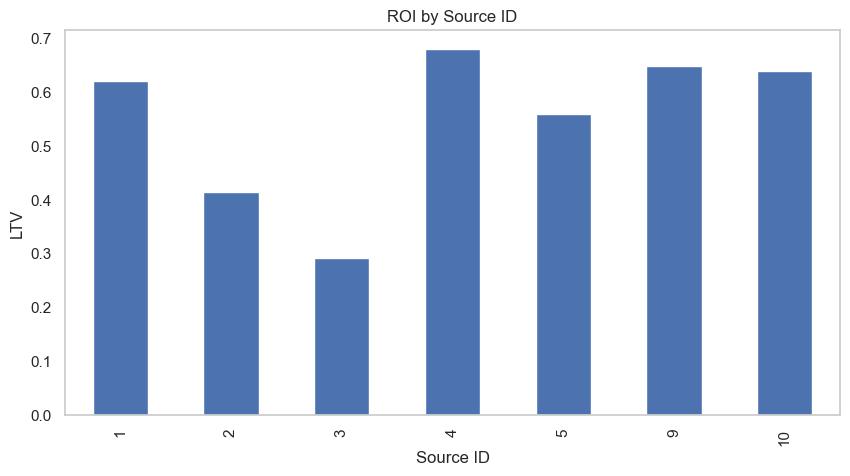

In [155]:
plt.figure(figsize=(10,5))
source_id_roi['source_ltv'].plot(kind='bar', grid=False)
plt.title('ROI by Source ID')
plt.xlabel('Source ID')
plt.ylabel('LTV');

#### There is no ROI for all source ID throughout the year, although source ID 4 followed by source ID 6 are the two highest. The most costly source ID was identified as source ID 3 earlier, and here we see the ROI for source ID 3 as the lowest. We can analyze over a longer period of time to see when we reach ROI, but that may cost the company more in expenses. We may want to really take a closer look at these sources and think about changing the ways we advertise. 

#### CAC from ad source ID 3 also costs the most monthly. We also see the reason for the high costs of advertising in August was also due to source ID 3. In a lot of the other months, source ID 10 is the second most expensive advertising source. 

In [156]:
#How worthwhile where the investments? (ROI)
print('ROI:', ((orders['revenue'].sum() - cac_source['costs'].sum())/ cac_source['costs'].sum()))

ROI: -0.2341750695360112


#### The ROI is negative which indicates that the total costs are greater than the profit. 

In [157]:
#analyzing visitors from different devices
device = visits.groupby(['session_month', 'device'])['uid'].sum().reset_index()
device.columns = ['session_month', 'device', 'visits']
device['session_month'] = device['session_month'].astype(str)
device.head()

session_month   device        visits
0    2017-06-01  desktop  1.138293e+23
1    2017-06-01    touch  3.785660e+22
2    2017-07-01  desktop  1.193248e+23
3    2017-07-01    touch  4.500046e+22
4    2017-08-01  desktop  1.002239e+23

<Figure size 1500x700 with 0 Axes>

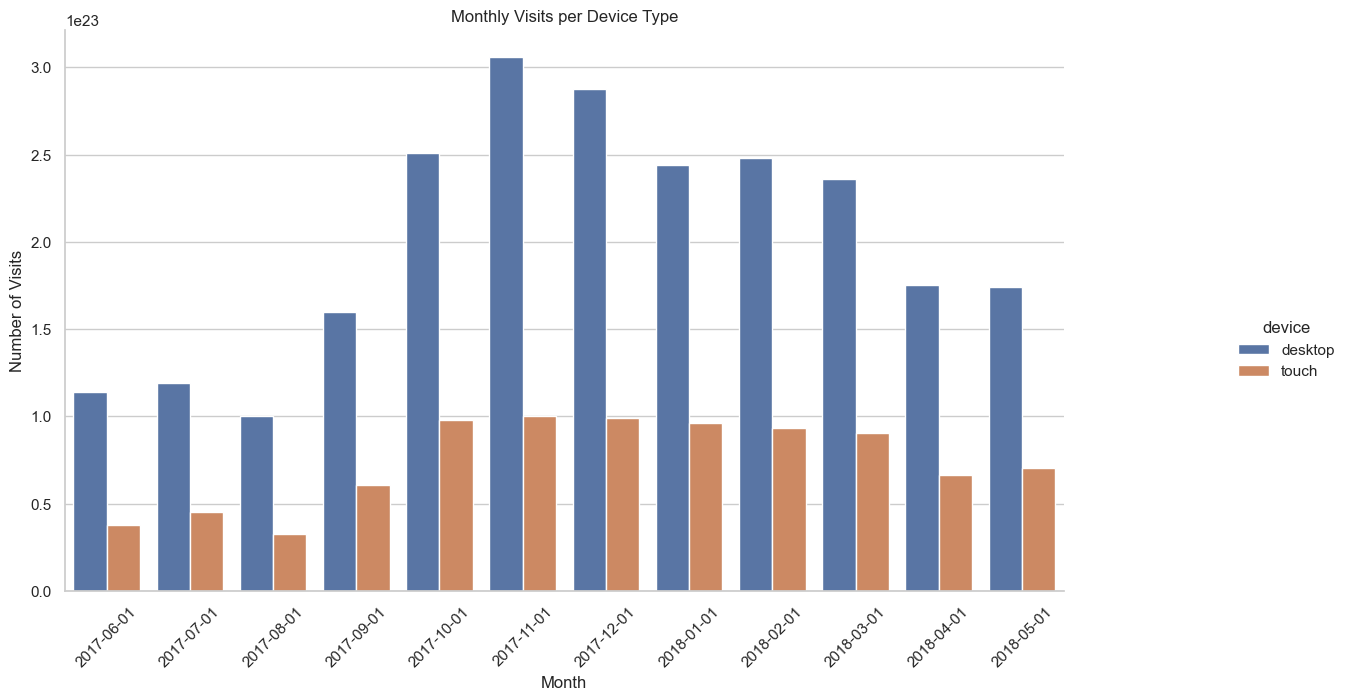

In [158]:
#plotting the monthly visits per device 
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,7))
g = sns.catplot(data=device, 
                kind='bar',
               x='session_month',
               y='visits',
               hue='device')
g.set_axis_labels("Month", "Number of Visits")
plt.title('Monthly Visits per Device Type')
g.fig.set_size_inches(15,7)
plt.xticks(rotation=45)
plt.show();

In [159]:
device.groupby('device')['visits'].mean()

device
desktop    2.013693e+23
touch      7.424730e+22
Name: visits, dtype: float64

#### More users visit the website via desktop.

## Conclusion

We first took a look at the daily, weekly, and monthly active users. The length of user sessions and the sticky factor are low. The number of active users seem to die off in the summer months. The average user session is one minute. Maybe the user interface of the website or website content is confusing or unappealing to the customer. We can look further into some aspects of UX/UI design.

Eight percent of users return the next day to purchase. The average purchase size per month is 5. The monthly revenue is highest in November and low in May. The number of monthly purchases decrease over time, although the first cohort of June has the highest number of purchases through the year. The number of orders also coincide with the revenue and November overall seems to be a popular time to browse the site and make purchases.

The total expense for advertising for the year is $329,131.62, with source ID 3 being the most costly. CAC costs in August is the highest, and the lowest in May. Source ID 3 is also identified as the being the highest for CAC in August and source ID 2 is highest for the rest of the year. CAC per month per month is costly for these two sources.

The ROI for the first cohort of June pays off in the 5th month. The cohort for the month of September does well and pays off earlier in the 4th month. The cohorts after do not reach an ROI until cohort month of December. We may want to replicate/ analyze what we did for the cohort month of September to reach the same ROI. There is no ROI for all source IDs throughout the year, although source ID 4 followed by source ID 6 are the two highest. The most costly source ID was identified as source ID 3  

While people are making purchases, our ROI is negative and costs for advertisement are high. We may want to really take a closer look at these sources and think about changing the ways we advertise to really make a ROI per source ID. I would advise to use ad sources that are low in cost and continue for those ad sources for desktop users. We should also look into the click-through rate and conversion rate regarding these advertisement sources.

The sales also hit a low in the summer. Maybe think of products to sell year round or have a second sale similar to Black Friday at this time.